In [3]:
import matplotlib.pyplot as plt
import pandas as pd


import numpy as np
import seaborn as sns

from scipy.stats import shapiro, f_oneway
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score


import math as m
import scipy.stats as sc

import statsmodels.api as sm
from statsmodels.formula.api import ols



In [74]:
df_test = pd.read_csv('P22406121-3_R1C0Q0_VQCOP-B004_2025-02-16-17-06-57.csv')
df_test.head()

,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C0Q0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-17-06-57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df = pd.read_csv('P22406121-3_R1C0Q0_VQCOP-B004_2025-02-16-17-06-57.csv',skiprows =18)
df.head

<bound method NDFrame.head of      Voltage step:  Dark current-r10.0  Dark current-r20.0  \
0              0.0            1.722248           -0.759726   
1             -0.1           -1.178123            0.486325   
2             -0.2           -1.195760            0.489876   
3             -0.3            0.724336            0.537373   
4             -0.4            0.778877            1.076609   
..             ...                 ...                 ...   
96            -9.6          -18.881170          -36.727170   
97            -9.7          -19.803120          -36.151440   
98            -9.8          -18.590600          -37.833820   
99            -9.9          -21.765650          -38.149710   
100          -10.0          -21.737880          -43.667560   

     Dark current-r30.0  Dark current-r40.0  Dark current-r50.0  \
0              1.681212           -0.277243           -1.537323   
1             -0.464730           -0.787608           -1.399836   
2              0.409374 

# ___________________________



Opcode	VQCOP-B004


Test name	Dark current measurement


Device ID	R1C0Q0	


Test start date	2025-02-16-17-06-57	

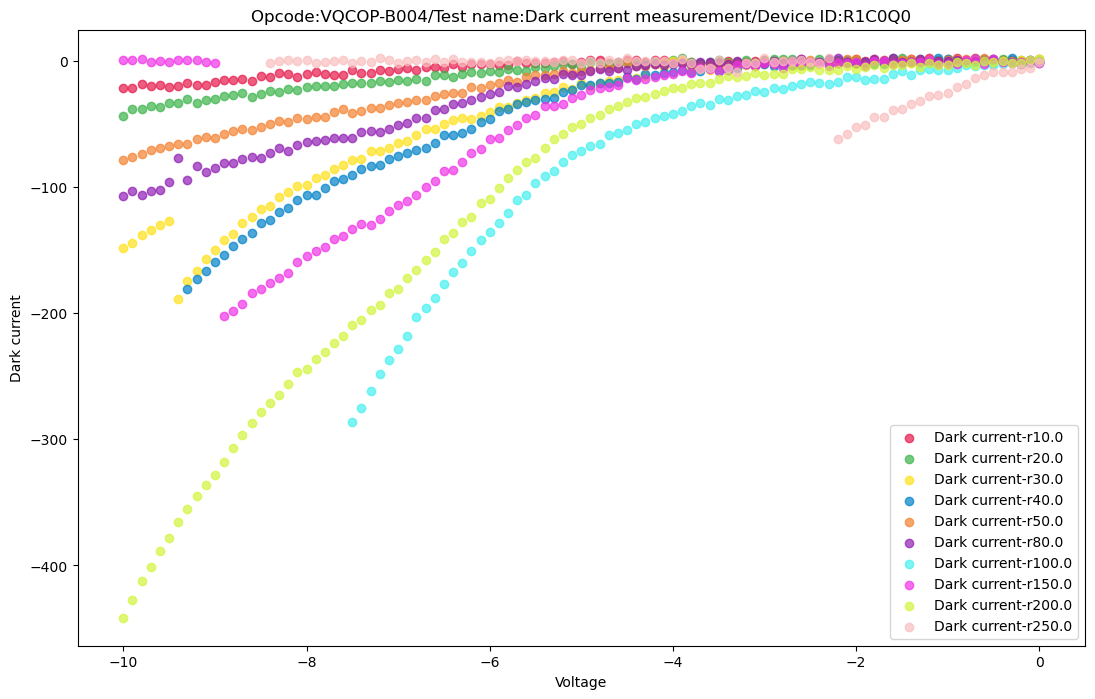

In [182]:


df = pd.read_csv('P22406121-3_R1C0Q0_VQCOP-B004_2025-02-16-17-06-57.csv',skiprows =18)
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]

plt.figure(figsize=(13, 8))


for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Dark current')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()


Text(0.5, 1.0, 'Device ID:R1C0Q0 / r250')

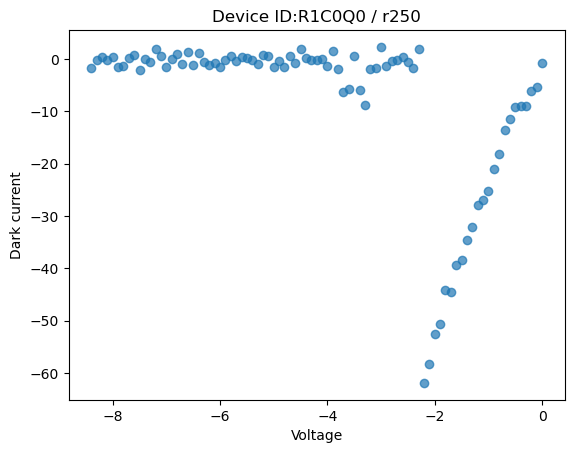

In [185]:
plt.scatter(df['Voltage step:'], df['Dark current-r250.0'], label=response, alpha=0.7)
plt.xlabel('Voltage')
plt.ylabel('Dark current')
plt.title('Device ID:R1C0Q0 / r250')



In [183]:
df.corr(method='spearman')

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.882644,0.932653,0.971043,0.985883,0.968690,0.962213,0.998879,0.462283,0.997635,-0.598261
Dark current-r10.0,0.882644,1.000000,0.841983,0.890833,0.841462,0.887047,0.860559,0.722816,0.348829,0.884089,-0.360582
Dark current-r20.0,0.932653,0.841983,1.000000,0.939088,0.926319,0.934615,0.940049,0.844025,0.405109,0.925396,-0.459226
Dark current-r30.0,0.971043,0.890833,0.939088,1.000000,0.954687,0.953803,0.941701,0.936760,0.447723,0.968165,-0.529861
Dark current-r40.0,0.985883,0.841462,0.926319,0.954687,1.000000,0.966622,0.952823,0.972413,0.756081,0.985117,-0.614286
Dark current-r50.0,0.968690,0.887047,0.934615,0.953803,0.966622,1.000000,0.954525,0.929023,0.445277,0.971904,-0.559566
Dark current-r80.0,0.962213,0.860559,0.940049,0.941701,0.952823,0.954525,1.000000,0.908489,0.435644,0.961468,-0.551378
Dark current-r100.0,0.998879,0.722816,0.844025,0.936760,0.972413,0.929023,0.908489,1.000000,0.960246,0.994040,-0.631306
Dark current-r150.0,0.462283,0.348829,0.405109,0.447723,0.756081,0.445277,0.435644,0.960246,1.000000,0.460501,-0.596404
Dark current-r200.0,0.997635,0.884089,0.925396,0.968165,0.985117,0.971904,0.961468,0.994040,0.460501,1.000000,-0.596326


r150 and r250 looks wierd with a low correlation 0.462283 and -0.59826

# _________________________


Opcode	VQCOP-B004	


Test name	Dark current measurement	


Device ID	R1C1Q0	


Test start date	2025-02-16-17-13-28

In [191]:
df = pd.read_csv('P22406121-3_R1C1Q0_VQCOP-B004_2025-02-16-17-13-28.csv',skiprows =19)

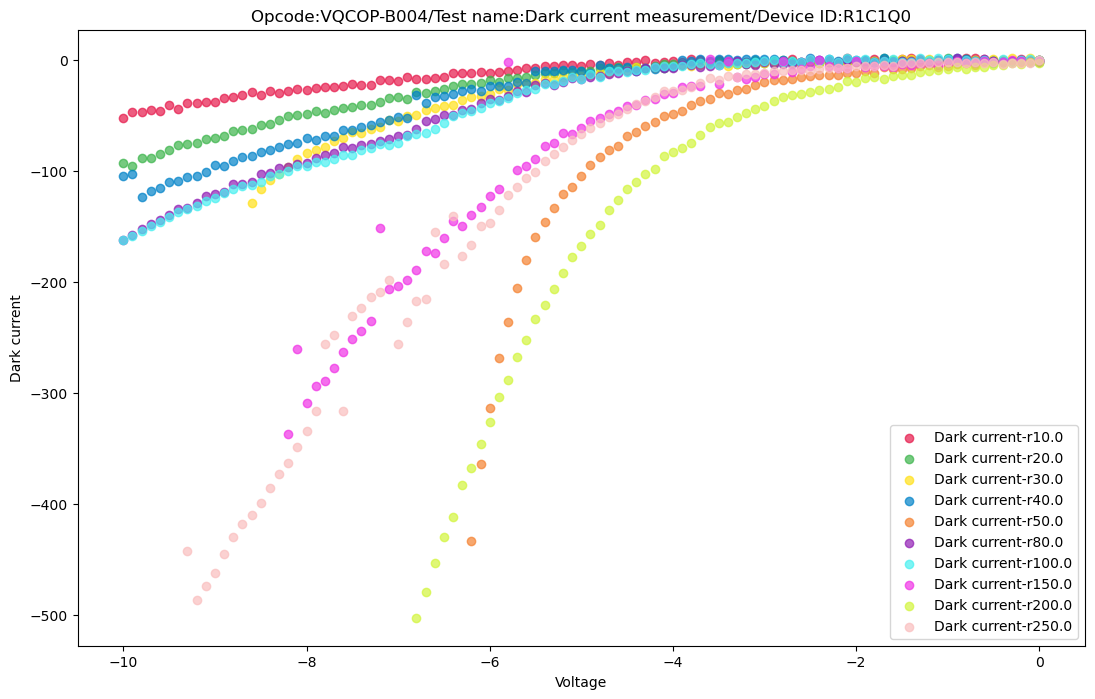

In [192]:
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]

plt.figure(figsize=(13, 8))


for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Dark current')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C1Q0')
plt.legend()  

plt.show()


Text(0.5, 1.0, 'Device ID:R1C1Q0/r150')

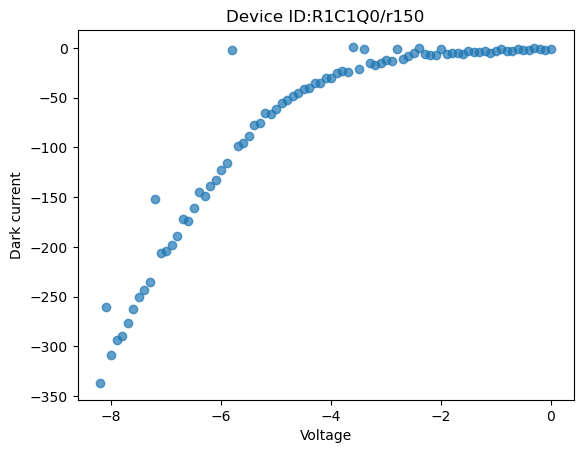

In [198]:
plt.scatter(df['Voltage step:'], df['Dark current-r150.0'], label=response, alpha=0.7)
plt.xlabel('Voltage')
plt.ylabel('Dark current')
plt.title('Device ID:R1C1Q0/r150')

In [194]:
df.corr(method='spearman')

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.949610,0.974630,0.981829,0.918456,0.998272,0.978838,0.973812,0.928697,0.999342,0.993483
Dark current-r10.0,0.949610,1.000000,0.940280,0.918349,0.901968,0.795219,0.933579,0.943497,0.837979,0.837961,0.930976
Dark current-r20.0,0.974630,0.940280,1.000000,0.955748,0.922428,0.893385,0.955157,0.960760,0.903363,0.917611,0.970971
Dark current-r30.0,0.981829,0.918349,0.955748,1.000000,0.860036,0.952333,0.952591,0.956290,0.912724,0.965619,0.977747
Dark current-r40.0,0.918456,0.901968,0.922428,0.860036,1.000000,0.670091,0.943101,0.932256,0.830484,0.745922,0.902438
Dark current-r50.0,0.998272,0.795219,0.893385,0.952333,0.670091,1.000000,0.914902,0.898268,0.837366,0.997312,0.980655
Dark current-r80.0,0.978838,0.933579,0.955157,0.952591,0.943101,0.914902,1.000000,0.979982,0.908384,0.935778,0.973272
Dark current-r100.0,0.973812,0.943497,0.960760,0.956290,0.932256,0.898268,0.979982,1.000000,0.888937,0.916578,0.966329
Dark current-r150.0,0.928697,0.837979,0.903363,0.912724,0.830484,0.837366,0.908384,0.888937,1.000000,0.877019,0.921330
Dark current-r200.0,0.999342,0.837961,0.917611,0.965619,0.745922,0.997312,0.935778,0.916578,0.877019,1.000000,0.986737



Opcode	VQCOP-B004	

Test name	Dark current measurement	

Device ID	R1C1Q2	

Test start date	2025-02-16-17-02-07

In [106]:
df = pd.read_csv('P22406121-3_R1C1Q2_VQCOP-B004_2025-02-16-17-02-07.csv')


In [206]:
df = pd.read_csv('P22406121-3_R1C1Q0_VQCOP-B004_2025-02-16-17-13-28.csv',skiprows =19)
df

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
0,0.0,-0.121014,-1.730805,0.281609,0.396802,-0.040513,-1.325563,-0.135566,-0.865257,-2.524292,-0.044180
1,-0.1,-0.094995,-0.202505,1.816603,-1.494598,0.321190,-0.733125,0.624277,-1.993612,-1.406064,-2.629473
2,-0.2,0.718981,-0.828411,-1.961191,-0.148022,-1.910958,-0.176602,-0.003667,-0.923639,-3.874477,-2.756249
3,-0.3,-0.722124,-1.620676,1.729815,-0.476954,-1.467939,-0.745000,-1.539534,-0.001339,-2.305314,-2.899615
4,-0.4,-0.133354,-0.545639,0.425265,-1.716835,-1.452165,-0.665139,1.345528,-1.896871,-4.788861,-3.962661
...,...,...,...,...,...,...,...,...,...,...,...
96,-9.6,-45.873490,-84.975440,NaN,-114.943200,NaN,-143.622100,-145.646200,NaN,NaN,NaN
97,-9.7,-44.930700,-87.742260,NaN,-118.255700,NaN,-147.382700,-149.761600,NaN,NaN,NaN
98,-9.8,-46.999480,-88.285890,NaN,-123.516100,NaN,-151.814200,-154.027000,NaN,NaN,NaN
99,-9.9,-46.847180,-94.927700,NaN,-102.702600,NaN,-157.352100,-158.514700,NaN,NaN,NaN


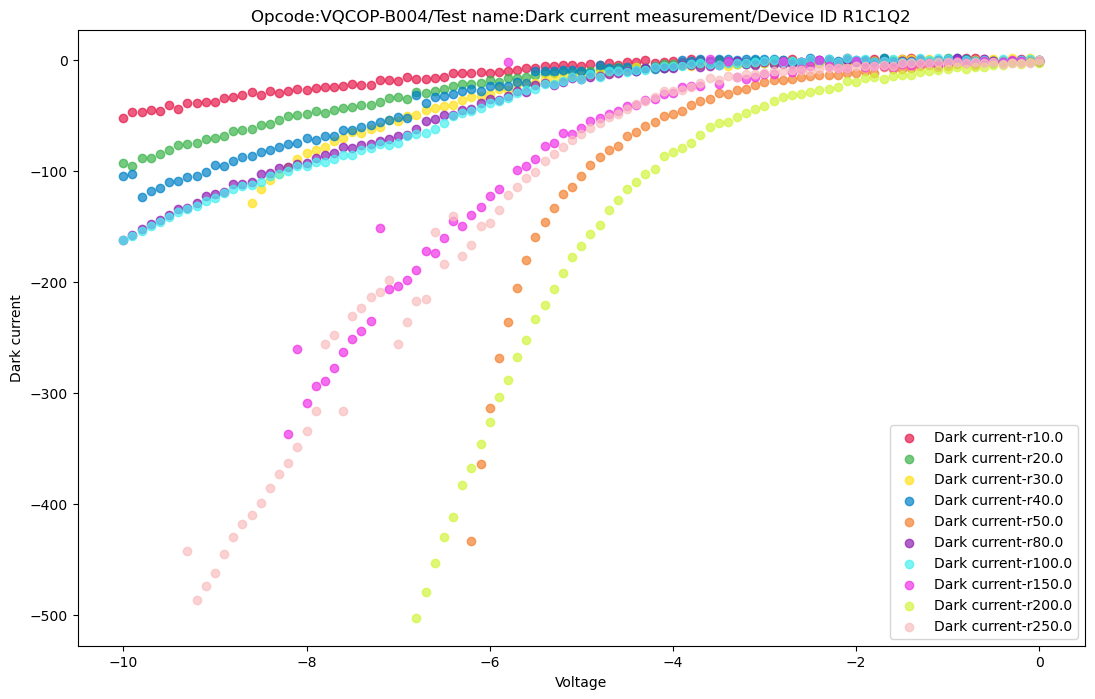

In [207]:
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Dark current')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID R1C1Q2')
plt.legend()  

plt.show()


In [208]:
df.corr(method='spearman')

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.949610,0.974630,0.981829,0.918456,0.998272,0.978838,0.973812,0.928697,0.999342,0.993483
Dark current-r10.0,0.949610,1.000000,0.940280,0.918349,0.901968,0.795219,0.933579,0.943497,0.837979,0.837961,0.930976
Dark current-r20.0,0.974630,0.940280,1.000000,0.955748,0.922428,0.893385,0.955157,0.960760,0.903363,0.917611,0.970971
Dark current-r30.0,0.981829,0.918349,0.955748,1.000000,0.860036,0.952333,0.952591,0.956290,0.912724,0.965619,0.977747
Dark current-r40.0,0.918456,0.901968,0.922428,0.860036,1.000000,0.670091,0.943101,0.932256,0.830484,0.745922,0.902438
Dark current-r50.0,0.998272,0.795219,0.893385,0.952333,0.670091,1.000000,0.914902,0.898268,0.837366,0.997312,0.980655
Dark current-r80.0,0.978838,0.933579,0.955157,0.952591,0.943101,0.914902,1.000000,0.979982,0.908384,0.935778,0.973272
Dark current-r100.0,0.973812,0.943497,0.960760,0.956290,0.932256,0.898268,0.979982,1.000000,0.888937,0.916578,0.966329
Dark current-r150.0,0.928697,0.837979,0.903363,0.912724,0.830484,0.837366,0.908384,0.888937,1.000000,0.877019,0.921330
Dark current-r200.0,0.999342,0.837961,0.917611,0.965619,0.745922,0.997312,0.935778,0.916578,0.877019,1.000000,0.986737


Text(0.5, 1.0, 'Device ID R1C1Q2/r40')

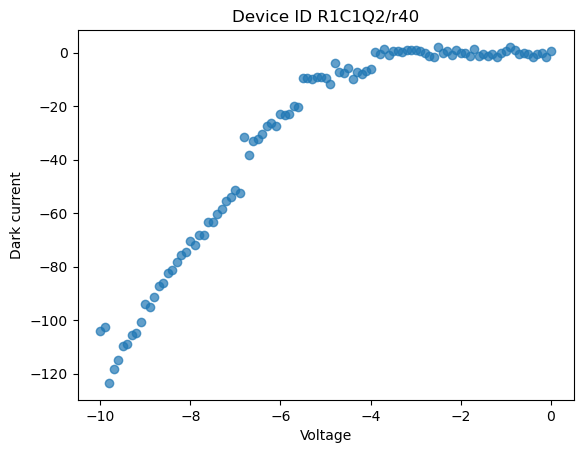

In [209]:
plt.scatter(df['Voltage step:'], df['Dark current-r40.0'], label=response, alpha=0.7)
plt.xlabel('Voltage')
plt.ylabel('Dark current')
plt.title('Device ID R1C1Q2/r40')



# ___________________________

Opcode	VQCOP-B004	

Test name	Dark current measurement

Device ID	R1C2Q0	

Test start date	2025-02-16-17-17-40


In [119]:
pd.read_csv('P22406121-3_R1C2Q0_VQCOP-B004_2025-02-16-17-17-40.csv')

,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C2Q0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-17-17-40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,-9.6,-74.20935,-42.29022,-48.01084,-66.82443,-75.17936,-149.7146,NaN,NaN,-370.724,NaN
116,-9.7,-82.76536,-43.16046,-51.0595,-70.58747,-75.52016,-154.184,NaN,NaN,-380.5917,NaN
117,-9.8,-89.79955,-47.36462,-52.1414,-70.68267,-79.15276,-159.0523,NaN,NaN,-389.7972,NaN
118,-9.9,NaN,-47.6393,-54.89119,-74.07533,-82.35482,-160.9866,NaN,NaN,-400.1266,NaN


In [211]:
df= pd.read_csv('P22406121-3_R1C2Q0_VQCOP-B004_2025-02-16-17-17-40.csv',skiprows =19)
df

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
0,0.0,1.984998,0.952918,-1.982320,-2.692512,1.281907,1.178007,-0.382250,1.031673,0.076718,-1.408742
1,-0.1,0.706583,-0.147207,0.085100,-1.224922,0.089756,-2.164510,-0.803382,-0.015192,-2.184999,-0.107160
2,-0.2,0.573171,1.129869,0.978180,-1.342618,0.770087,0.135857,-0.948727,-1.008622,-1.978187,-0.593194
3,-0.3,1.697277,-0.411179,-0.550237,-0.090164,1.074513,0.452273,0.340457,-2.277957,-0.662287,-2.480112
4,-0.4,-0.945816,0.452273,2.630113,1.731678,-0.787608,-1.234643,-0.733882,-4.396483,0.024505,-2.206187
...,...,...,...,...,...,...,...,...,...,...,...
96,-9.6,-74.209350,-42.290220,-48.010840,-66.824430,-75.179360,-149.714600,NaN,NaN,-370.724000,NaN
97,-9.7,-82.765360,-43.160460,-51.059500,-70.587470,-75.520160,-154.184000,NaN,NaN,-380.591700,NaN
98,-9.8,-89.799550,-47.364620,-52.141400,-70.682670,-79.152760,-159.052300,NaN,NaN,-389.797200,NaN
99,-9.9,NaN,-47.639300,-54.891190,-74.075330,-82.354820,-160.986600,NaN,NaN,-400.126600,NaN


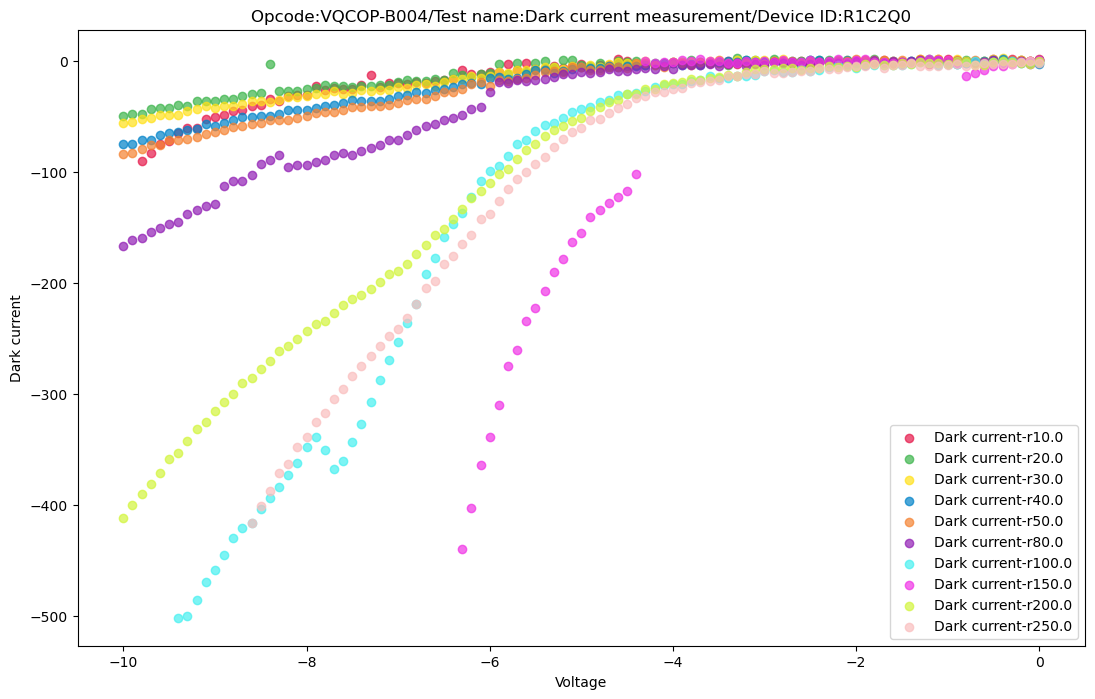

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.929066,0.871683,0.932836,0.943879,0.968652,0.979327,0.997284,0.601786,0.995166,0.994842
Dark current-r10.0,0.929066,1.000000,0.840049,0.898429,0.889066,0.908500,0.917282,0.917203,0.520879,0.924131,0.884578
Dark current-r20.0,0.871683,0.840049,1.000000,0.886663,0.877449,0.847580,0.885489,0.847648,0.414881,0.878940,0.801232
Dark current-r30.0,0.932836,0.898429,0.886663,1.000000,0.931520,0.920113,0.938518,0.916545,0.603388,0.937717,0.898192
Dark current-r40.0,0.943879,0.889066,0.877449,0.931520,1.000000,0.923258,0.944895,0.933217,0.617903,0.944892,0.908982
Dark current-r50.0,0.968652,0.908500,0.847580,0.920113,0.923258,1.000000,0.964991,0.961251,0.745636,0.969525,0.939851
Dark current-r80.0,0.979327,0.917282,0.885489,0.938518,0.944895,0.964991,1.000000,0.972253,0.623473,0.981820,0.969067
Dark current-r100.0,0.997284,0.917203,0.847648,0.916545,0.933217,0.961251,0.972253,1.000000,0.599542,0.992973,0.990650
Dark current-r150.0,0.601786,0.520879,0.414881,0.603388,0.617903,0.745636,0.623473,0.599542,1.000000,0.621291,0.591712
Dark current-r200.0,0.995166,0.924131,0.878940,0.937717,0.944892,0.969525,0.981820,0.992973,0.621291,1.000000,0.987953


In [214]:
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Dark current')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C2Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

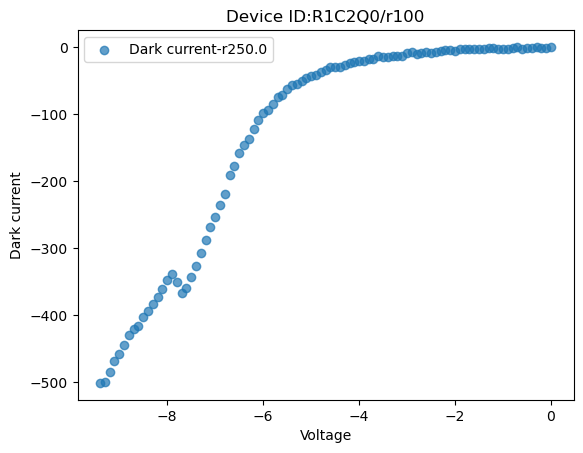

In [218]:
plt.scatter(df['Voltage step:'], df['Dark current-r100.0'], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Dark current')
plt.title('Device ID:R1C2Q0/r100')
plt.legend()  

plt.show()


_______

P22406121-3_R1C4Q0_VQCOP-B004_2025-02-16-16-42-43.csv

0	Opcode	VQCOP-B004	

1	Test name	Dark current measurement

2	Device ID	R1C4Q0	

3	Test start date	2025-02-16-16-42-43	

In [137]:
df = pd.read_csv('P22406121-3_R1C4Q0_VQCOP-B004_2025-02-16-16-42-43.csv',skiprows =19)
df


,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
0,0.0,1.423643,-0.192202,0.114727,-2.094603,0.757049,1.436740,-1.228822,-1.898850,1.034117,-1.348846
1,-0.1,-0.249536,1.817767,0.378816,0.778877,-0.571075,-0.167696,-3.579946,-1.567474,-1.770328,1.358276
2,-0.2,-2.318353,0.365311,1.717475,-2.032088,0.372180,-2.301938,-4.654983,-0.724278,0.452273,0.130909
3,-0.3,2.448389,1.090870,-0.382250,-0.979460,0.233005,1.283770,-7.417577,-1.089997,-0.741158,-1.147680
4,-0.4,-0.065542,-0.025553,1.188717,-0.601984,-1.699489,0.312633,-9.567593,1.140172,-1.047680,-0.811822
...,...,...,...,...,...,...,...,...,...,...,...
96,-9.6,-65.350440,-36.705490,-51.225770,-160.901600,NaN,-202.816600,NaN,-247.570500,-284.869800,-431.381600
97,-9.7,-69.815640,-36.769520,-49.457860,-165.508300,NaN,-209.395300,NaN,-255.198900,-290.939700,-442.076400
98,-9.8,-72.393130,-39.510400,-53.581750,-171.050500,NaN,-220.007200,NaN,-260.767100,-301.394400,-460.575300
99,-9.9,-72.489410,-41.831660,-55.744840,-177.139800,NaN,-224.085400,NaN,-269.185300,-305.982700,-470.627500


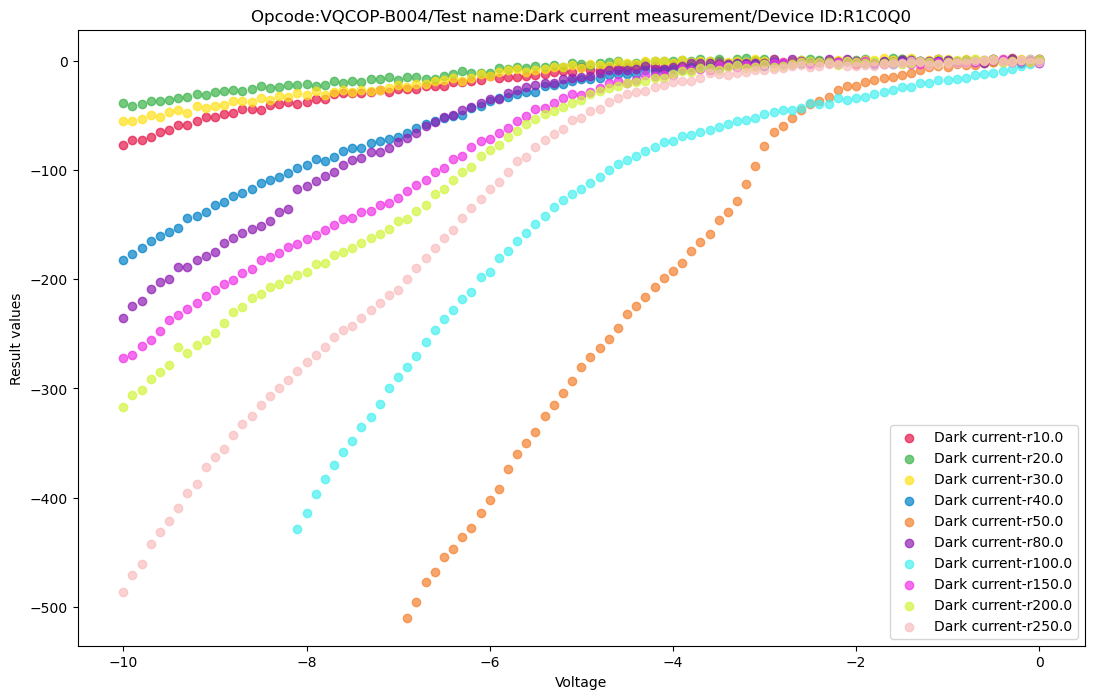

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.973943,0.913034,0.944621,0.983995,0.999720,0.973162,0.999891,0.985242,0.989761,0.996529
Dark current-r10.0,0.973943,1.000000,0.937228,0.931057,0.974118,0.922177,0.969726,0.952047,0.962749,0.966010,0.975655
Dark current-r20.0,0.913034,0.937228,1.000000,0.918209,0.919220,0.739375,0.910029,0.838378,0.908550,0.905801,0.913232
Dark current-r30.0,0.944621,0.931057,0.918209,1.000000,0.945390,0.831361,0.946136,0.895816,0.939321,0.934010,0.945029
Dark current-r40.0,0.983995,0.974118,0.919220,0.945390,1.000000,0.949996,0.982225,0.969221,0.974875,0.975585,0.986104
Dark current-r50.0,0.999720,0.922177,0.739375,0.831361,0.949996,1.000000,0.918432,0.999615,0.956574,0.970361,0.989047
Dark current-r80.0,0.973162,0.969726,0.910029,0.946136,0.982225,0.918432,1.000000,0.948869,0.962900,0.970402,0.973885
Dark current-r100.0,0.999891,0.952047,0.838378,0.895816,0.969221,0.999615,0.948869,1.000000,0.971942,0.980692,0.993187
Dark current-r150.0,0.985242,0.962749,0.908550,0.939321,0.974875,0.956574,0.962900,0.971942,1.000000,0.984077,0.982586
Dark current-r200.0,0.989761,0.966010,0.905801,0.934010,0.975585,0.970361,0.970402,0.980692,0.984077,1.000000,0.985812


In [139]:
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

____

0	Opcode	VQCOP-B004

1	Test name	Dark current measurement

2	Device ID	R1C4Q1	

3	Test start date	2025-02-16-16-48-20



In [144]:
df = pd.read_csv('P22406121-3_R1C4Q1_VQCOP-B004_2025-02-16-16-48-20.csv',skiprows=19)
df

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
0,0.0,1.072127,1.253502,-0.926666,-0.595290,-0.015192,1.335167,0.573171,-0.306289,-2.715271,-2.594781
1,-0.1,0.765023,-0.926375,-1.712178,-1.533306,0.644825,-0.004540,-2.228306,0.886153,-1.762121,-0.606175
2,-0.2,-0.702508,-0.605302,-2.106652,2.128305,0.346452,1.609907,-1.410022,0.606349,-2.594781,-1.351291
3,-0.3,0.928820,0.417291,-0.107160,-1.361128,-1.895183,-1.356530,0.849017,-0.416359,0.409898,-0.767526
4,-0.4,-0.745873,0.022410,-0.028056,-0.107160,-0.727887,1.076085,-1.893146,-1.777138,1.026783,-0.522879
...,...,...,...,...,...,...,...,...,...,...,...
96,-9.6,-17.888790,-30.455350,-44.426620,-62.094910,-72.491180,-29.954770,NaN,-174.551900,-258.456400,-370.248000
97,-9.7,-18.832860,-32.573150,-45.902300,-62.871430,-76.012920,-30.264670,NaN,-177.878500,-262.748400,-383.670300
98,-9.8,-20.220640,-32.857760,-45.675490,-68.446740,-73.961480,-30.829750,NaN,-194.324000,-271.308500,-392.539700
99,-9.9,-20.460460,-31.515020,-47.423960,-68.484490,-79.540540,-29.421470,NaN,-199.289100,-278.562900,-405.488400


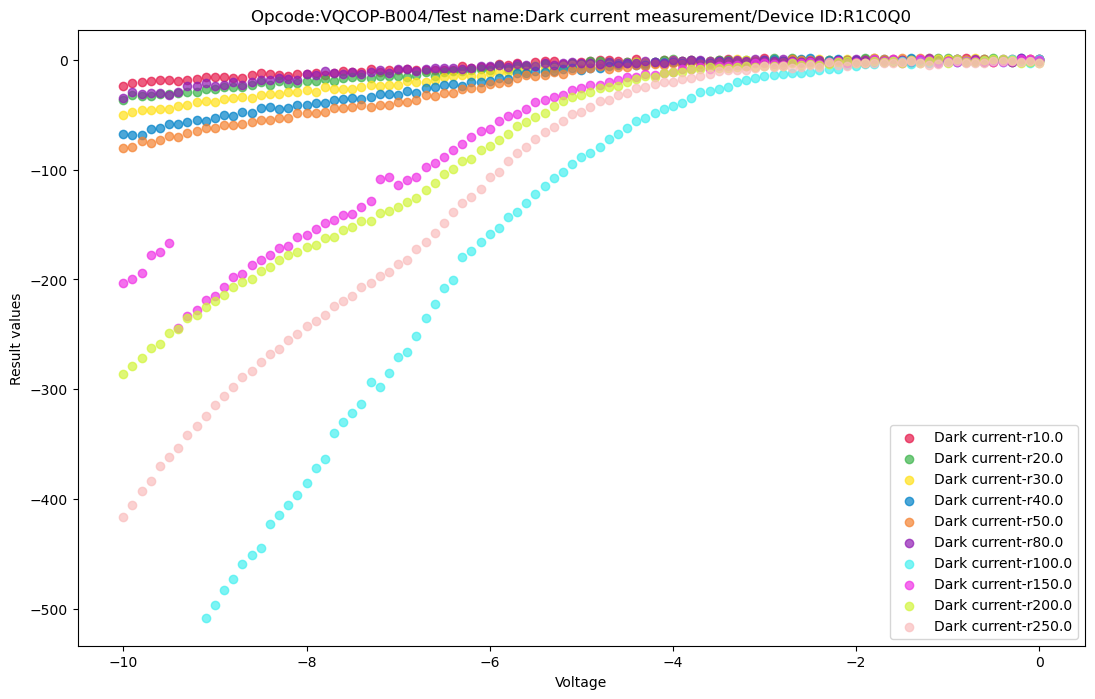

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.906255,0.927886,0.934770,0.950344,0.970204,0.943314,0.993573,0.983180,0.989144,0.992967
Dark current-r10.0,0.906255,1.000000,0.897379,0.870879,0.885055,0.915935,0.886767,0.884823,0.911660,0.898835,0.893672
Dark current-r20.0,0.927886,0.897379,1.000000,0.901095,0.915597,0.911951,0.893005,0.908851,0.917845,0.929505,0.925891
Dark current-r30.0,0.934770,0.870879,0.901095,1.000000,0.919022,0.938346,0.913057,0.909622,0.921479,0.945079,0.930865
Dark current-r40.0,0.950344,0.885055,0.915597,0.919022,1.000000,0.959930,0.917711,0.934513,0.956704,0.953815,0.955332
Dark current-r50.0,0.970204,0.915935,0.911951,0.938346,0.959930,1.000000,0.935882,0.963380,0.966034,0.972289,0.963451
Dark current-r80.0,0.943314,0.886767,0.893005,0.913057,0.917711,0.935882,1.000000,0.919015,0.934339,0.934665,0.932565
Dark current-r100.0,0.993573,0.884823,0.908851,0.909622,0.934513,0.963380,0.919015,1.000000,0.982122,0.983339,0.985508
Dark current-r150.0,0.983180,0.911660,0.917845,0.921479,0.956704,0.966034,0.934339,0.982122,1.000000,0.977368,0.979356
Dark current-r200.0,0.989144,0.898835,0.929505,0.945079,0.953815,0.972289,0.934665,0.983339,0.977368,1.000000,0.987266


In [146]:
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

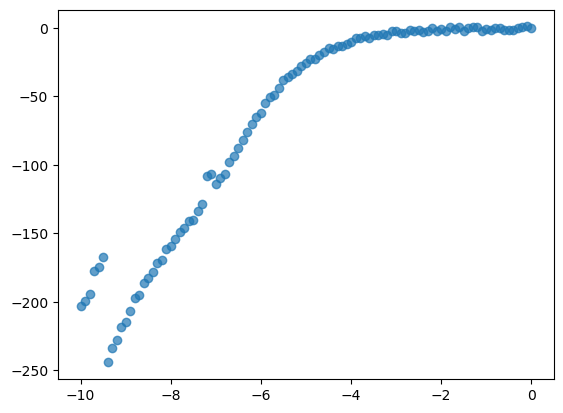

In [147]:
plt.scatter(df['Voltage step:'], df['Dark current-r150.0'], label=response, alpha=0.7)

Opcode	VQCOP-B004


Test name	Dark current measurement	


Device ID	R1C4Q2	


Test start date	2025-02-16-16-57-42


In [150]:
pd.read_csv('P22406121-3_R1C4Q2_VQCOP-B004_2025-02-16-16-57-42.csv')

,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C4Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-16-57-42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,-9.6,-23.16252,-31.42853,-40.59525,-127.2702,-63.50927,-238.8775,-437.4887,-179.3559,-0.7875497,NaN
116,-9.7,-23.00821,-33.44537,-41.59537,-132.3098,-67.50828,-239.1821,-446.1776,-185.7473,-2.876215,NaN
117,-9.8,-23.92021,-31.29605,-43.00766,-137.4527,-69.61849,-248.4827,-454.0509,-190.8322,-1.836452,NaN
118,-9.9,-22.65332,-34.68833,-42.61252,-142.6449,-71.51897,-250.7328,-464.6461,-196.4205,-3.060268,NaN


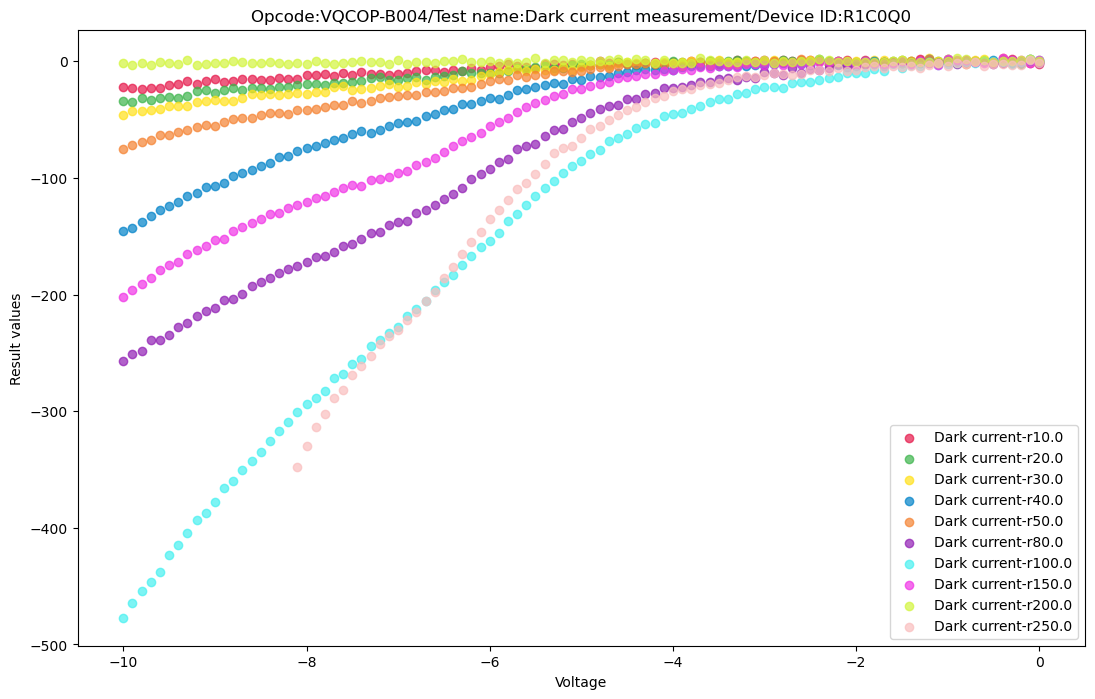

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.898229,0.921305,0.956273,0.988573,0.953384,0.995221,0.998917,0.986092,0.512707,0.994558
Dark current-r10.0,0.898229,1.000000,0.905242,0.873908,0.902423,0.910274,0.906287,0.895550,0.914141,0.501047,0.804573
Dark current-r20.0,0.921305,0.905242,1.000000,0.914269,0.925626,0.913873,0.923456,0.922050,0.920909,0.488385,0.856945
Dark current-r30.0,0.956273,0.873908,0.914269,1.000000,0.958334,0.939220,0.954080,0.958497,0.938963,0.456602,0.924163
Dark current-r40.0,0.988573,0.902423,0.925626,0.958334,1.000000,0.955585,0.983515,0.990600,0.979814,0.504955,0.974053
Dark current-r50.0,0.953384,0.910274,0.913873,0.939220,0.955585,1.000000,0.955972,0.953116,0.947781,0.521106,0.903440
Dark current-r80.0,0.995221,0.906287,0.923456,0.954080,0.983515,0.955972,1.000000,0.994348,0.984400,0.515417,0.984714
Dark current-r100.0,0.998917,0.895550,0.922050,0.958497,0.990600,0.953116,0.994348,1.000000,0.984450,0.512194,0.994580
Dark current-r150.0,0.986092,0.914141,0.920909,0.938963,0.979814,0.947781,0.984400,0.984450,1.000000,0.527693,0.965064
Dark current-r200.0,0.512707,0.501047,0.488385,0.456602,0.504955,0.521106,0.515417,0.512194,0.527693,1.000000,0.318482


In [149]:

df = pd.read_csv('P22406121-3_R1C4Q2_VQCOP-B004_2025-02-16-16-57-42.csv',skiprows=19)
df
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

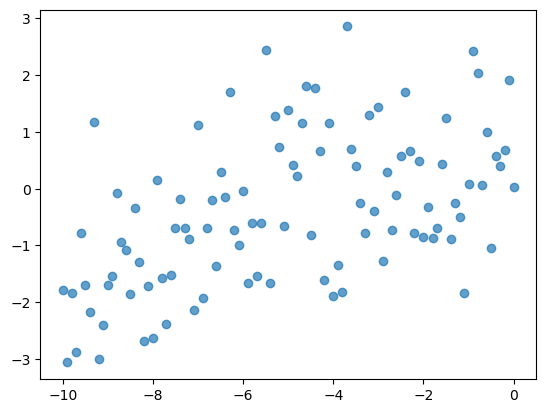

In [151]:
plt.scatter(df['Voltage step:'], df['Dark current-r200.0'], label=response, alpha=0.7)

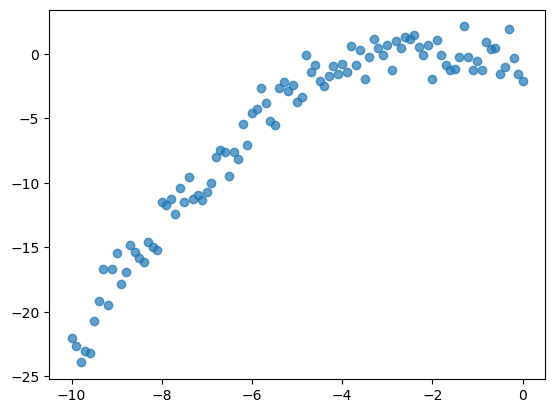

In [152]:
plt.scatter(df['Voltage step:'], df['Dark current-r10.0'], label=response, alpha=0.7)

0	Opcode	VQCOP-B004


1	Test name	Dark current measurement	

2	Device ID	R1C5Q0	

3	Test start date	2025-02-16-16-32-20	

4	Test end date	-	

In [154]:
pd.read_csv('P22406121-3_R1C5Q0_VQCOP-B004_2025-02-16-16-32-20.csv')


,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C5Q0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-16-32-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,-9.6,-20.17815,-80.37401,-45.92392,-71.12091,-97.54201,-112.5952,NaN,-222.7896,-392.315,NaN
116,-9.7,-23.66165,-79.5105,-49.56772,-74.65642,-98.7736,-114.213,NaN,-227.133,-401.8567,NaN
117,-9.8,-25.86417,-82.37979,-50.54966,-75.25721,-102.9262,-116.6818,NaN,-232.9642,-412.7315,NaN
118,-9.9,-25.96132,-82.84624,-50.39418,-77.52998,-105.8276,-119.3824,NaN,-241.025,-426.7289,NaN


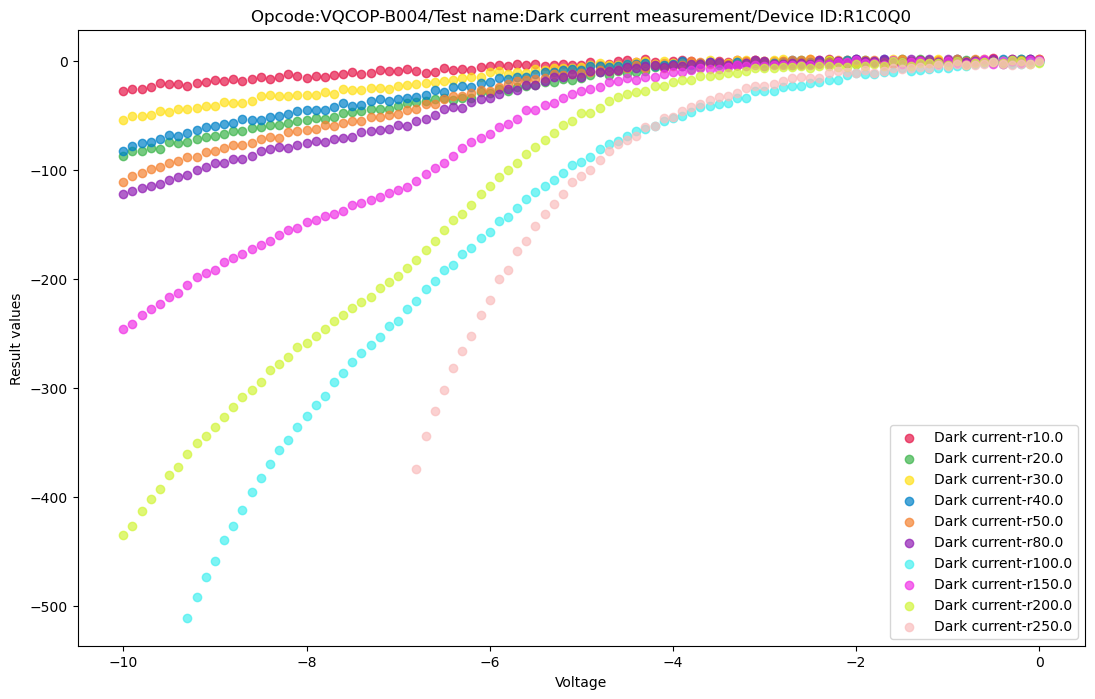

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.922504,0.978055,0.936401,0.972778,0.967268,0.975411,0.999278,0.988864,0.993815,0.996858
Dark current-r10.0,0.922504,1.000000,0.903250,0.909365,0.928888,0.897740,0.914898,0.906354,0.918614,0.916843,0.764194
Dark current-r20.0,0.978055,0.903250,1.000000,0.928294,0.953663,0.968445,0.962761,0.971188,0.970448,0.980431,0.932189
Dark current-r30.0,0.936401,0.909365,0.928294,1.000000,0.920012,0.913419,0.917379,0.921887,0.936995,0.942446,0.801754
Dark current-r40.0,0.972778,0.928888,0.953663,0.920012,1.000000,0.949528,0.962667,0.966622,0.970716,0.966220,0.908732
Dark current-r50.0,0.967268,0.897740,0.968445,0.913419,0.949528,1.000000,0.954083,0.959860,0.956669,0.963366,0.903179
Dark current-r80.0,0.975411,0.914898,0.962761,0.917379,0.962667,0.954083,1.000000,0.968081,0.979301,0.972603,0.919839
Dark current-r100.0,0.999278,0.906354,0.971188,0.921887,0.966622,0.959860,0.968081,1.000000,0.985883,0.992168,0.996675
Dark current-r150.0,0.988864,0.918614,0.970448,0.936995,0.970716,0.956669,0.979301,0.985883,1.000000,0.986814,0.965364
Dark current-r200.0,0.993815,0.916843,0.980431,0.942446,0.966220,0.963366,0.972603,0.992168,0.986814,1.000000,0.977932


In [156]:

df = pd.read_csv('P22406121-3_R1C5Q0_VQCOP-B004_2025-02-16-16-32-20.csv',skiprows=19)
df
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

0	Opcode	VQCOP-B004	

1	Test name	Dark current measurement	

2	Device ID	R1C5Q0	

3	Test start date	2025-02-16-16-37-27



In [159]:
pd.read_csv('P22406121-3_R1C5Q1_VQCOP-B004_2025-02-16-16-37-27.csv')


,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C5Q0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-16-37-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,-9.6,-36.91399,-33.69391,-45.56245,-53.73816,-68.98737,-184.8675,-174.2981,-244.6919,-340.7942,-271.1107
116,-9.7,-38.37456,-33.74775,-45.72785,-56.32601,-68.26021,-211.21,-181.3359,-250.2236,-350.0499,-276.32
117,-9.8,-38.23827,-37.72517,-47.73316,-61.3406,-70.70656,-190.0508,-184.4878,-258.0377,-357.1947,-286.8333
118,-9.9,-39.74428,-37.45206,-48.3047,-61.15501,-74.94807,-203.1602,-189.4016,-264.4623,-366.4071,-297.6324


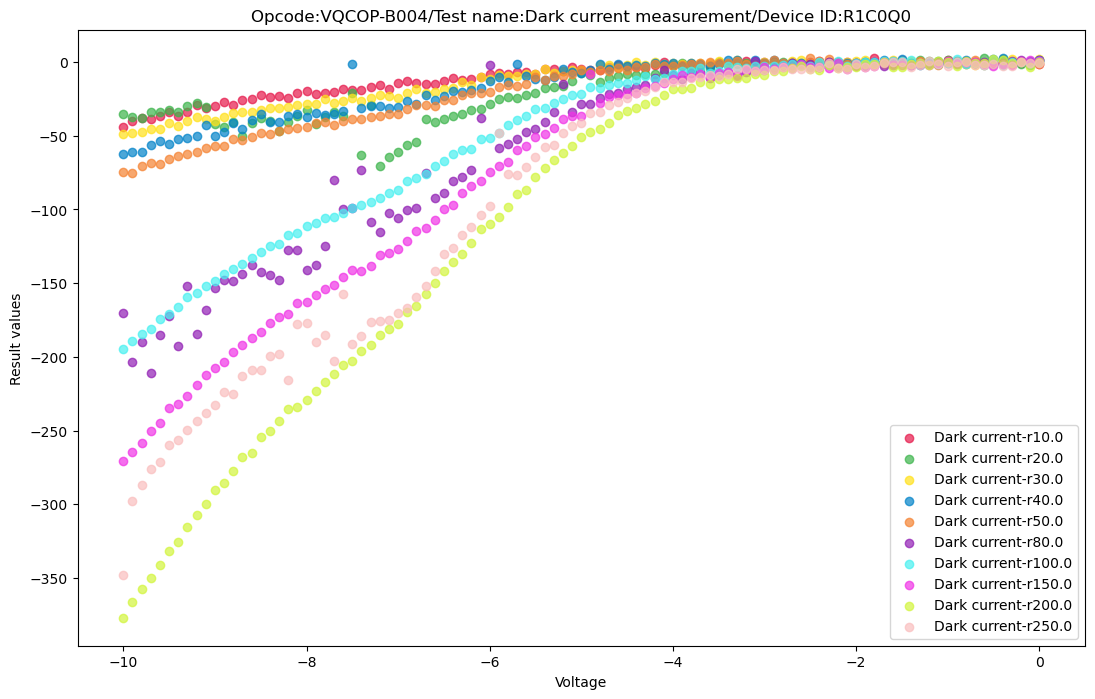

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.942167,0.888678,0.936599,0.934059,0.942167,0.974164,0.982574,0.990274,0.993011,0.987257
Dark current-r10.0,0.942167,1.000000,0.859196,0.902120,0.905789,0.950542,0.924450,0.952499,0.943821,0.940769,0.951765
Dark current-r20.0,0.888678,0.859196,1.000000,0.844356,0.845183,0.852673,0.870169,0.867420,0.890518,0.890751,0.880920
Dark current-r30.0,0.936599,0.902120,0.844356,1.000000,0.926115,0.917857,0.907245,0.938602,0.921060,0.928224,0.929260
Dark current-r40.0,0.934059,0.905789,0.845183,0.926115,1.000000,0.916156,0.925556,0.937076,0.923879,0.932662,0.930181
Dark current-r50.0,0.942167,0.950542,0.852673,0.917857,0.916156,1.000000,0.914688,0.947979,0.937076,0.935632,0.951404
Dark current-r80.0,0.974164,0.924450,0.870169,0.907245,0.925556,0.914688,1.000000,0.959709,0.961875,0.973605,0.964100
Dark current-r100.0,0.982574,0.952499,0.867420,0.938602,0.937076,0.947979,0.959709,1.000000,0.978882,0.977635,0.983471
Dark current-r150.0,0.990274,0.943821,0.890518,0.921060,0.923879,0.937076,0.961875,0.978882,1.000000,0.986558,0.980780
Dark current-r200.0,0.993011,0.940769,0.890751,0.928224,0.932662,0.935632,0.973605,0.977635,0.986558,1.000000,0.980792


In [160]:

df = pd.read_csv('P22406121-3_R1C5Q1_VQCOP-B004_2025-02-16-16-37-27.csv',skiprows=19)
df
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

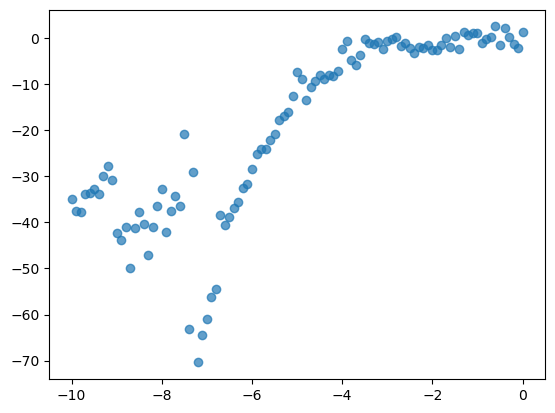

In [162]:
plt.scatter(df['Voltage step:'], df['Dark current-r20.0'], label=response, alpha=0.7)

0	Opcode	VQCOP-B004	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN


1	Test name	Dark current measurement	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN


2	Device ID	R1C5Q2	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN


3	Test start date	2025-02-16-16-52-53	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN


4	Test end date	-	

In [163]:
pd.read_csv('P22406121-3_R1C5Q2_VQCOP-B004_2025-02-16-16-52-53.csv')


,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C5Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-16-52-53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,-9.6,-20.24975,-31.91023,-52.98798,-69.91616,-64.38809,NaN,-121.0586,-279.2369,NaN,-515.8286
116,-9.7,-24.05973,-35.81127,-53.46994,-73.05478,-67.06271,NaN,-123.7028,-285.146,NaN,NaN
117,-9.8,-24.0861,-34.9014,-55.55744,-74.19605,-68.28047,NaN,-127.9353,-294.8905,NaN,NaN
118,-9.9,-26.18245,-36.16689,-56.43626,-75.83105,-69.5051,NaN,-130.7724,-302.6805,NaN,NaN


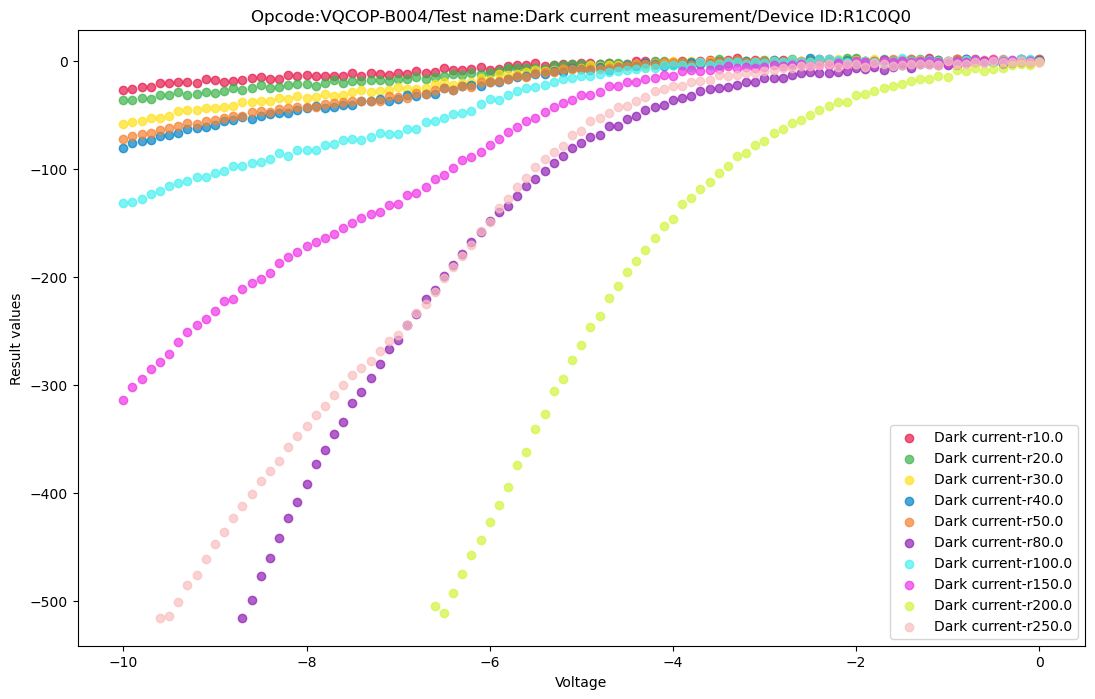

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.924415,0.934222,0.946430,0.967187,0.962365,0.997834,0.972755,0.992475,0.999521,0.993912
Dark current-r10.0,0.924415,1.000000,0.912440,0.893023,0.930810,0.919965,0.887006,0.934490,0.926197,0.748424,0.915843
Dark current-r20.0,0.934222,0.912440,1.000000,0.916284,0.932533,0.927373,0.899880,0.930798,0.940513,0.782225,0.929676
Dark current-r30.0,0.946430,0.893023,0.916284,1.000000,0.949750,0.943378,0.923884,0.945020,0.944042,0.817264,0.939091
Dark current-r40.0,0.967187,0.930810,0.932533,0.949750,1.000000,0.950705,0.947448,0.952813,0.959103,0.886384,0.962195
Dark current-r50.0,0.962365,0.919965,0.927373,0.943378,0.950705,1.000000,0.938731,0.956738,0.954432,0.872296,0.951504
Dark current-r80.0,0.997834,0.887006,0.899880,0.923884,0.947448,0.938731,1.000000,0.958473,0.989785,0.994413,0.989874
Dark current-r100.0,0.972755,0.934490,0.930798,0.945020,0.952813,0.956738,0.958473,1.000000,0.969645,0.907934,0.963221
Dark current-r150.0,0.992475,0.926197,0.940513,0.944042,0.959103,0.954432,0.989785,0.969645,1.000000,0.974379,0.987731
Dark current-r200.0,0.999521,0.748424,0.782225,0.817264,0.886384,0.872296,0.994413,0.907934,0.974379,1.000000,0.980485


In [165]:

df = pd.read_csv('P22406121-3_R1C5Q2_VQCOP-B004_2025-02-16-16-52-53.csv',skiprows=19)
df
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

P22406121-3_R1C6Q0_VQCOP-B004_2025-02-16-16-20-04
Opcode	VQCOP-B004	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN


1	Test name	Dark current measurement	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN


2	Device ID	R1C6Q0	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN


3	Test start date	2025-02-16-16-20-04

In [166]:
pd.read_csv('P22406121-3_R1C6Q0_VQCOP-B004_2025-02-16-16-20-04.csv')

,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C6Q0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-16-20-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,-9.6,-0.8542556,-67.31547,-66.93031,NaN,-203.3607,-267.1665,NaN,-415.2281,-371.9697,NaN
116,-9.7,0.6762566,-71.08875,-67.76632,NaN,-206.7073,-271.0428,NaN,-423.1542,-382.0364,NaN
117,-9.8,0.7880153,-74.61544,-70.79184,NaN,-213.8905,-278.3629,NaN,-436.4565,-391.3839,NaN
118,-9.9,-1.363223,-82.5249,-73.21307,NaN,-218.3165,-285.2755,NaN,-447.7114,-399.1628,NaN


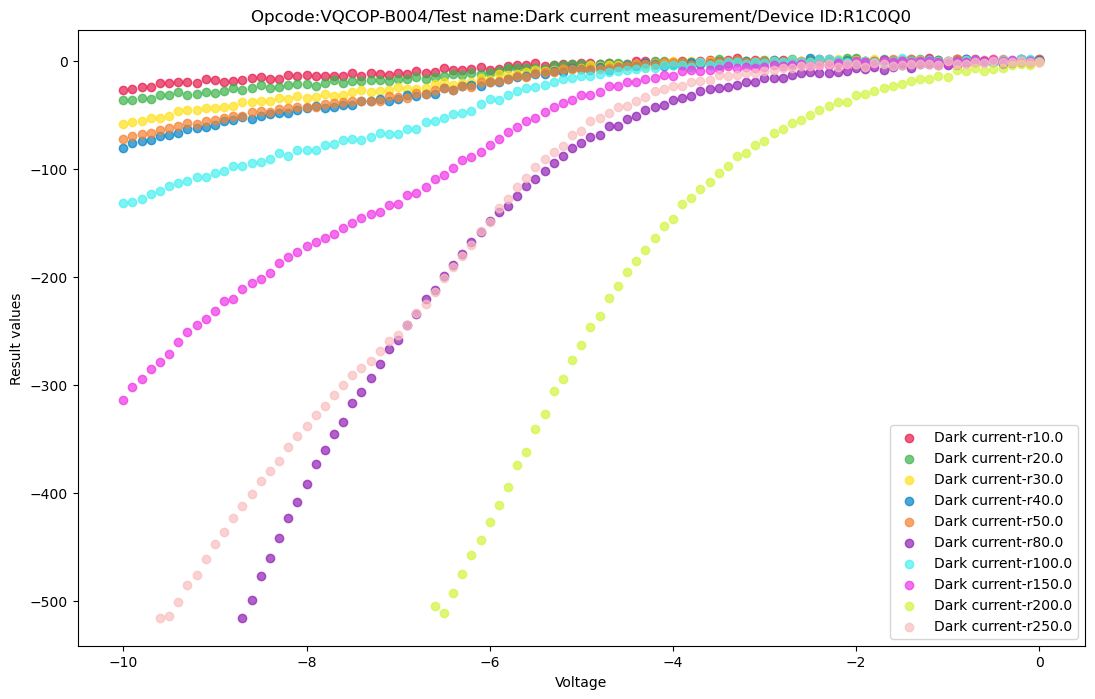

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.924415,0.934222,0.946430,0.967187,0.962365,0.997834,0.972755,0.992475,0.999521,0.993912
Dark current-r10.0,0.924415,1.000000,0.912440,0.893023,0.930810,0.919965,0.887006,0.934490,0.926197,0.748424,0.915843
Dark current-r20.0,0.934222,0.912440,1.000000,0.916284,0.932533,0.927373,0.899880,0.930798,0.940513,0.782225,0.929676
Dark current-r30.0,0.946430,0.893023,0.916284,1.000000,0.949750,0.943378,0.923884,0.945020,0.944042,0.817264,0.939091
Dark current-r40.0,0.967187,0.930810,0.932533,0.949750,1.000000,0.950705,0.947448,0.952813,0.959103,0.886384,0.962195
Dark current-r50.0,0.962365,0.919965,0.927373,0.943378,0.950705,1.000000,0.938731,0.956738,0.954432,0.872296,0.951504
Dark current-r80.0,0.997834,0.887006,0.899880,0.923884,0.947448,0.938731,1.000000,0.958473,0.989785,0.994413,0.989874
Dark current-r100.0,0.972755,0.934490,0.930798,0.945020,0.952813,0.956738,0.958473,1.000000,0.969645,0.907934,0.963221
Dark current-r150.0,0.992475,0.926197,0.940513,0.944042,0.959103,0.954432,0.989785,0.969645,1.000000,0.974379,0.987731
Dark current-r200.0,0.999521,0.748424,0.782225,0.817264,0.886384,0.872296,0.994413,0.907934,0.974379,1.000000,0.980485


In [167]:

pd.read_csv('P22406121-3_R1C6Q0_VQCOP-B004_2025-02-16-16-20-04.csv',skiprows=19)
df
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

0	Opcode	VQCOP-B004	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

1	Test name	Dark current measurement	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN


2	Device ID	R1C6Q1	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN


3	Test start date	2025-02-16-16-25-37

In [168]:
pd.read_csv('P22406121-3_R1C6Q1_VQCOP-B004_2025-02-16-16-25-37.csv')

,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C6Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-16-25-37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,-9.6,-16.97254,-52.33465,-63.23596,-65.96313,-84.99957,-119.9325,-288.555,NaN,NaN,-375.4628
116,-9.7,-20.62938,-55.27513,-61.55708,-70.6602,-85.81916,-120.4818,-299.0262,NaN,NaN,-331.9015
117,-9.8,-18.15247,-57.11979,-64.00025,-71.63777,-88.63103,-126.4799,-308.4337,NaN,NaN,-342.4447
118,-9.9,-18.64415,-58.11281,-66.93325,-74.165,-87.69601,-129.0303,-316.7415,NaN,NaN,-351.1155


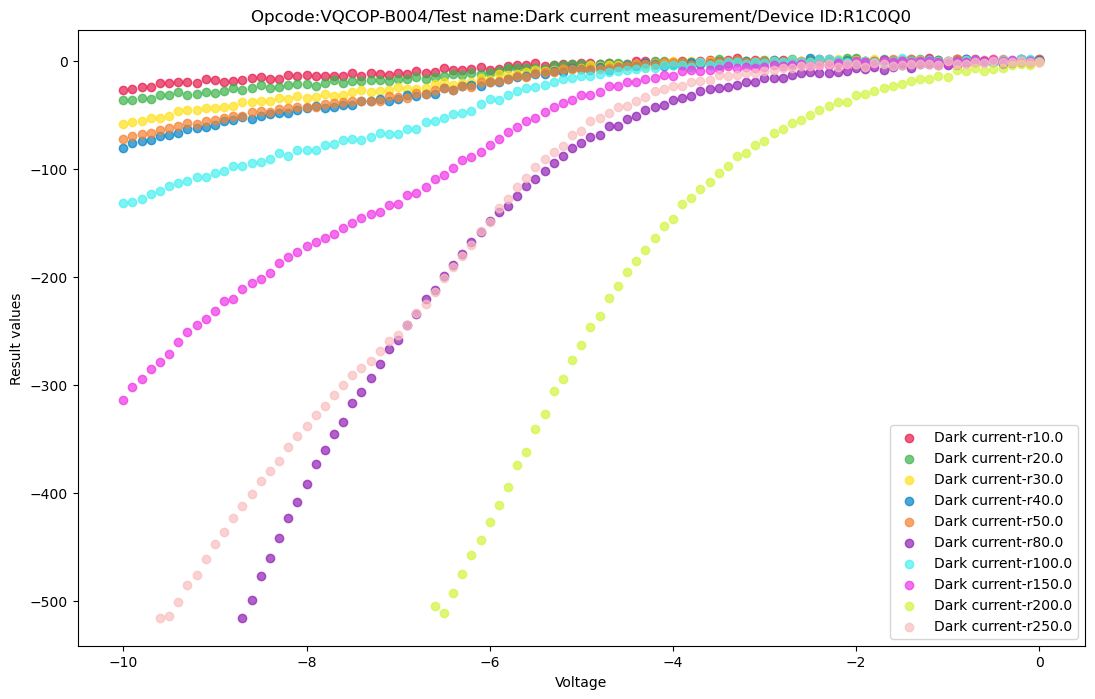

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.924415,0.934222,0.946430,0.967187,0.962365,0.997834,0.972755,0.992475,0.999521,0.993912
Dark current-r10.0,0.924415,1.000000,0.912440,0.893023,0.930810,0.919965,0.887006,0.934490,0.926197,0.748424,0.915843
Dark current-r20.0,0.934222,0.912440,1.000000,0.916284,0.932533,0.927373,0.899880,0.930798,0.940513,0.782225,0.929676
Dark current-r30.0,0.946430,0.893023,0.916284,1.000000,0.949750,0.943378,0.923884,0.945020,0.944042,0.817264,0.939091
Dark current-r40.0,0.967187,0.930810,0.932533,0.949750,1.000000,0.950705,0.947448,0.952813,0.959103,0.886384,0.962195
Dark current-r50.0,0.962365,0.919965,0.927373,0.943378,0.950705,1.000000,0.938731,0.956738,0.954432,0.872296,0.951504
Dark current-r80.0,0.997834,0.887006,0.899880,0.923884,0.947448,0.938731,1.000000,0.958473,0.989785,0.994413,0.989874
Dark current-r100.0,0.972755,0.934490,0.930798,0.945020,0.952813,0.956738,0.958473,1.000000,0.969645,0.907934,0.963221
Dark current-r150.0,0.992475,0.926197,0.940513,0.944042,0.959103,0.954432,0.989785,0.969645,1.000000,0.974379,0.987731
Dark current-r200.0,0.999521,0.748424,0.782225,0.817264,0.886384,0.872296,0.994413,0.907934,0.974379,1.000000,0.980485


In [170]:

pd.read_csv('P22406121-3_R1C6Q1_VQCOP-B004_2025-02-16-16-25-37.csv',skiprows=19)
df
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

Opcode	VQCOP-B004	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

1	Test name	Dark current measurement	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

2	Device ID	R1C7Q0		NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

3	Test start date	2025-02-16-16-25-37	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN



In [173]:
pd.read_csv('P22406121-3_R1C7Q0_VQCOP-B004_2025-02-16-16-15-25.csv')

,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C7Q0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-16-15-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,-9.6,1.593726,-36.84725,-63.8598,-80.85318,-132.6575,-131.5235,-210.7288,NaN,NaN,-381.2198
116,-9.7,-1.481734,-39.95959,-65.61942,-80.78566,-136.8763,-137.3399,-216.0073,NaN,NaN,-389.9988
117,-9.8,2.536981,-41.45518,-66.99056,-82.03008,-142.8879,-139.5023,-221.2467,NaN,NaN,-402.3101
118,-9.9,0.7630442,-42.89055,-67.10758,-85.46541,-143.5659,-142.9382,-225.2213,NaN,NaN,-415.017


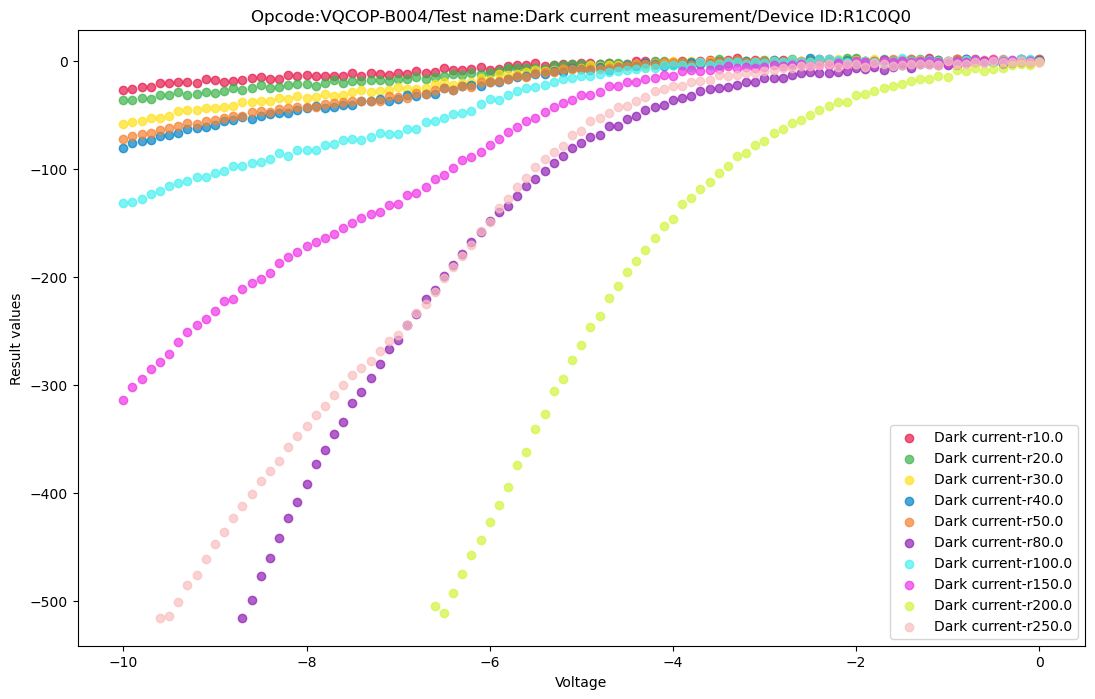

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.924415,0.934222,0.946430,0.967187,0.962365,0.997834,0.972755,0.992475,0.999521,0.993912
Dark current-r10.0,0.924415,1.000000,0.912440,0.893023,0.930810,0.919965,0.887006,0.934490,0.926197,0.748424,0.915843
Dark current-r20.0,0.934222,0.912440,1.000000,0.916284,0.932533,0.927373,0.899880,0.930798,0.940513,0.782225,0.929676
Dark current-r30.0,0.946430,0.893023,0.916284,1.000000,0.949750,0.943378,0.923884,0.945020,0.944042,0.817264,0.939091
Dark current-r40.0,0.967187,0.930810,0.932533,0.949750,1.000000,0.950705,0.947448,0.952813,0.959103,0.886384,0.962195
Dark current-r50.0,0.962365,0.919965,0.927373,0.943378,0.950705,1.000000,0.938731,0.956738,0.954432,0.872296,0.951504
Dark current-r80.0,0.997834,0.887006,0.899880,0.923884,0.947448,0.938731,1.000000,0.958473,0.989785,0.994413,0.989874
Dark current-r100.0,0.972755,0.934490,0.930798,0.945020,0.952813,0.956738,0.958473,1.000000,0.969645,0.907934,0.963221
Dark current-r150.0,0.992475,0.926197,0.940513,0.944042,0.959103,0.954432,0.989785,0.969645,1.000000,0.974379,0.987731
Dark current-r200.0,0.999521,0.748424,0.782225,0.817264,0.886384,0.872296,0.994413,0.907934,0.974379,1.000000,0.980485


In [174]:

pd.read_csv('P22406121-3_R1C7Q0_VQCOP-B004_2025-02-16-16-15-25.csv',skiprows=19)
df
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

0	Opcode	VQCOP-B004	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

1	Test name	Dark current measurement	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

2	Device ID	R1C8Q0	NaN	NaN,
NaN	NaN	NaN	NaN	NaN	NaN	NaN

3	Test start date	2025-02-16-16-00-16	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

4	Test end date	

In [177]:
pd.read_csv('P22406121-3_R1C8Q0_VQCOP-B004_2025-02-16-16-00-16.csv')

,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C8Q0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-16-00-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,-9.6,-28.31744,0.7333001,-80.41938,-94.85328,-94.17249,-418.6489,-206.6715,NaN,NaN,NaN
116,-9.7,-28.07798,0.49220400000000003,-81.82568,-96.17562,-96.75015,-430.5673,-209.1853,NaN,NaN,NaN
117,-9.8,-27.44573,-1.370732,-84.1897,-96.28254,-101.2319,-435.7238,-212.7647,NaN,NaN,NaN
118,-9.9,-31.36648,-0.2598972,-87.84051,-100.2376,-99.92067,-448.0389,-219.0166,NaN,NaN,NaN


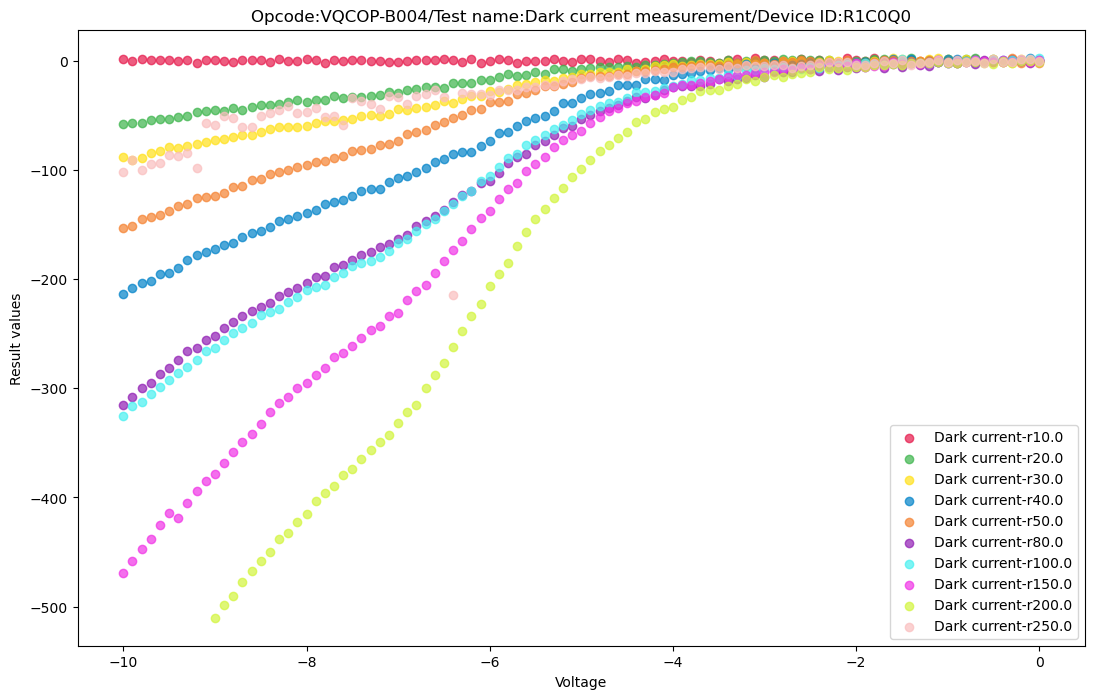

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,-0.008212,0.952930,0.972941,0.993326,0.974933,0.998008,0.997251,0.997714,0.997308,0.980245
Dark current-r10.0,-0.008212,1.000000,0.019441,-0.040559,-0.014805,0.009645,-0.001491,-0.010344,-0.004106,0.037020,-0.013739
Dark current-r20.0,0.952930,0.019441,1.000000,0.961479,0.948678,0.959324,0.953395,0.951730,0.953247,0.937888,0.939022
Dark current-r30.0,0.972941,-0.040559,0.961479,1.000000,0.972382,0.965265,0.973267,0.974141,0.975850,0.965918,0.963494
Dark current-r40.0,0.993326,-0.014805,0.948678,0.972382,1.000000,0.973395,0.990763,0.992196,0.991692,0.991320,0.975737
Dark current-r50.0,0.974933,0.009645,0.959324,0.965265,0.973395,1.000000,0.975597,0.974304,0.973491,0.963211,0.960419
Dark current-r80.0,0.998008,-0.001491,0.953395,0.973267,0.990763,0.975597,1.000000,0.994991,0.996281,0.994044,0.976971
Dark current-r100.0,0.997251,-0.010344,0.951730,0.974141,0.992196,0.974304,0.994991,1.000000,0.996275,0.994330,0.981444
Dark current-r150.0,0.997714,-0.004106,0.953247,0.975850,0.991692,0.973491,0.996281,0.996275,1.000000,0.997281,0.979001
Dark current-r200.0,0.997308,0.037020,0.937888,0.965918,0.991320,0.963211,0.994044,0.994330,0.997281,1.000000,0.977703


In [240]:

pd.read_csv('P22406121-3_R1C8Q0_VQCOP-B004_2025-02-16-16-00-16.csv',skiprows=19)
df
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

Opcode	VQCOP-B004	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

1	Test name	Dark current measurement	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

2	Device ID	R1C8Q1	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

3	Test start date	2025-02-16-16-04-57	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN	NaN

4	Test end date	-	

In [180]:


pd.read_csv('P22406121-3_R1C8Q1_VQCOP-B004_2025-02-16-16-04-57.csv')

,[Metadata],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Opcode,VQCOP-B004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test name,Dark current measurement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Device ID,R1C8Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Test start date,2025-02-16-16-04-57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Test end date,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115,-9.6,0.8623465,-53.6571,-83.17546,-195.32,-141.5488,-286.927,-299.1951,-425.4642,NaN,-93.39905
116,-9.7,0.1711887,-54.05495,-84.8496,-202.0728,-142.9051,-295.2149,-304.9875,-437.7251,NaN,-94.54857
117,-9.8,1.059147,-56.78204,-88.9104,-204.0965,-145.0773,-300.0679,-313.0911,-447.5766,NaN,-100.2773
118,-9.9,-0.5386537,-57.3718,-91.07473,-208.3131,-151.7372,-307.8666,-316.5649,-458.2012,NaN,-91.39042


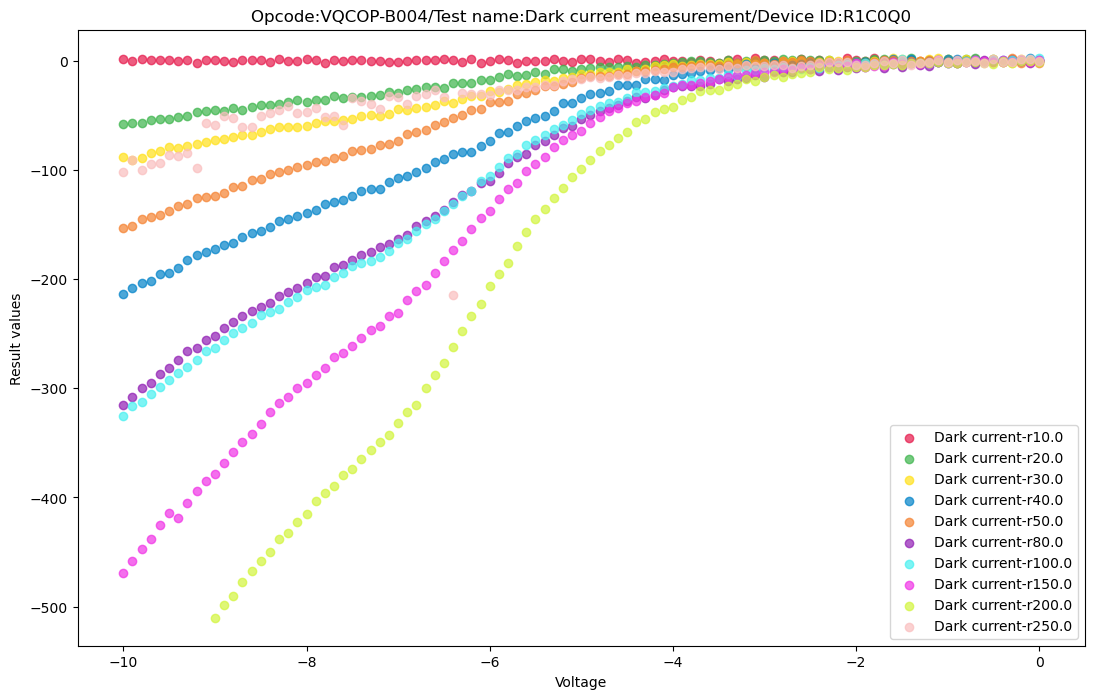

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,-0.008212,0.952930,0.972941,0.993326,0.974933,0.998008,0.997251,0.997714,0.997308,0.980245
Dark current-r10.0,-0.008212,1.000000,0.019441,-0.040559,-0.014805,0.009645,-0.001491,-0.010344,-0.004106,0.037020,-0.013739
Dark current-r20.0,0.952930,0.019441,1.000000,0.961479,0.948678,0.959324,0.953395,0.951730,0.953247,0.937888,0.939022
Dark current-r30.0,0.972941,-0.040559,0.961479,1.000000,0.972382,0.965265,0.973267,0.974141,0.975850,0.965918,0.963494
Dark current-r40.0,0.993326,-0.014805,0.948678,0.972382,1.000000,0.973395,0.990763,0.992196,0.991692,0.991320,0.975737
Dark current-r50.0,0.974933,0.009645,0.959324,0.965265,0.973395,1.000000,0.975597,0.974304,0.973491,0.963211,0.960419
Dark current-r80.0,0.998008,-0.001491,0.953395,0.973267,0.990763,0.975597,1.000000,0.994991,0.996281,0.994044,0.976971
Dark current-r100.0,0.997251,-0.010344,0.951730,0.974141,0.992196,0.974304,0.994991,1.000000,0.996275,0.994330,0.981444
Dark current-r150.0,0.997714,-0.004106,0.953247,0.975850,0.991692,0.973491,0.996281,0.996275,1.000000,0.997281,0.979001
Dark current-r200.0,0.997308,0.037020,0.937888,0.965918,0.991320,0.963211,0.994044,0.994330,0.997281,1.000000,0.977703


In [219]:

df = pd.read_csv('P22406121-3_R1C8Q1_VQCOP-B004_2025-02-16-16-04-57.csv',skiprows=19)
df
# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Result values')
plt.title('Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C0Q0')
plt.legend()  

plt.show()

df.corr(method='spearman')

In [227]:
R1C0Q0 = pd.read_csv('P22406121-3_R1C0Q0_VQCOP-B004_2025-02-16-17-06-57.csv',skiprows =18)
R1C1Q0 = pd.read_csv('P22406121-3_R1C1Q0_VQCOP-B004_2025-02-16-17-13-28.csv',skiprows =19)
R1C1Q2 = pd.read_csv('P22406121-3_R1C1Q2_VQCOP-B004_2025-02-16-17-02-07.csv',skiprows =19)
R1C2Q0 = pd.read_csv('P22406121-3_R1C2Q0_VQCOP-B004_2025-02-16-17-17-40.csv',skiprows =19)
R1C4Q0 = pd.read_csv('P22406121-3_R1C4Q0_VQCOP-B004_2025-02-16-16-42-43.csv',skiprows =19)
R1C4Q1 = pd.read_csv('P22406121-3_R1C4Q1_VQCOP-B004_2025-02-16-16-48-20.csv',skiprows =19)
R1C4Q2 = pd.read_csv('P22406121-3_R1C4Q2_VQCOP-B004_2025-02-16-16-57-42.csv',skiprows =19)
R1C5Q0 = pd.read_csv('P22406121-3_R1C5Q0_VQCOP-B004_2025-02-16-16-32-20.csv',skiprows =19)
R1C5Q1 = pd.read_csv('P22406121-3_R1C5Q1_VQCOP-B004_2025-02-16-16-37-27.csv',skiprows =19)
R1C5Q2 = pd.read_csv('P22406121-3_R1C5Q2_VQCOP-B004_2025-02-16-16-52-53.csv',skiprows =19)
R1C6Q0 = pd.read_csv('P22406121-3_R1C6Q0_VQCOP-B004_2025-02-16-16-20-04.csv',skiprows =19)
R1C6Q1 = pd.read_csv('P22406121-3_R1C6Q1_VQCOP-B004_2025-02-16-16-25-37.csv',skiprows =19)
R1C7Q0 = pd.read_csv('P22406121-3_R1C7Q0_VQCOP-B004_2025-02-16-16-15-25.csv',skiprows =19)
R1C8Q0 = pd.read_csv('P22406121-3_R1C8Q0_VQCOP-B004_2025-02-16-16-00-16.csv',skiprows=19)
R1C8Q1 = pd.read_csv('P22406121-3_R1C8Q1_VQCOP-B004_2025-02-16-16-04-57.csv',skiprows=19)



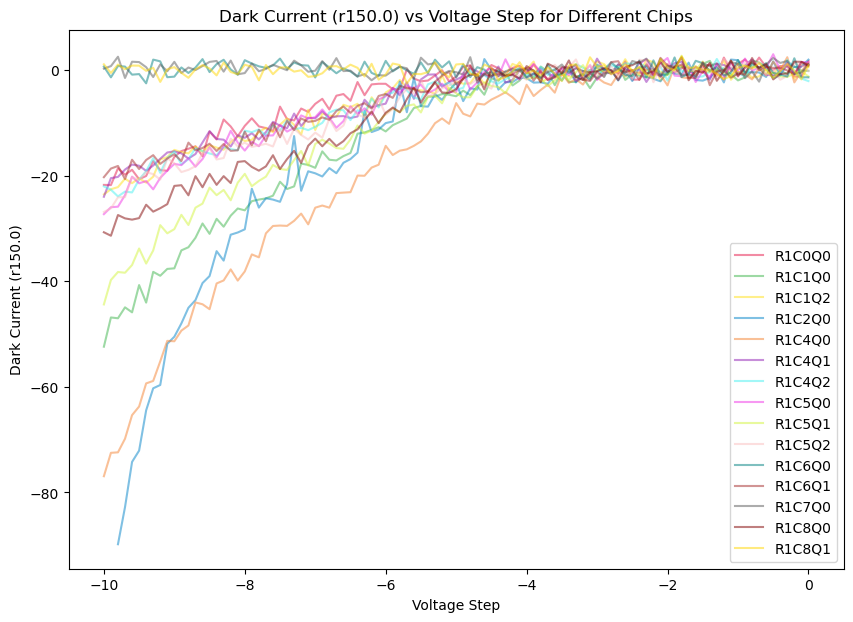

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the filenames and corresponding skiprows values
files = {
    "R1C0Q0": ('P22406121-3_R1C0Q0_VQCOP-B004_2025-02-16-17-06-57.csv', 18),
    "R1C1Q0": ('P22406121-3_R1C1Q0_VQCOP-B004_2025-02-16-17-13-28.csv', 19),
    "R1C1Q2": ('P22406121-3_R1C1Q2_VQCOP-B004_2025-02-16-17-02-07.csv', 19),
    "R1C2Q0": ('P22406121-3_R1C2Q0_VQCOP-B004_2025-02-16-17-17-40.csv', 19),
    "R1C4Q0": ('P22406121-3_R1C4Q0_VQCOP-B004_2025-02-16-16-42-43.csv', 19),
    "R1C4Q1": ('P22406121-3_R1C4Q1_VQCOP-B004_2025-02-16-16-48-20.csv', 19),
    "R1C4Q2": ('P22406121-3_R1C4Q2_VQCOP-B004_2025-02-16-16-57-42.csv', 19),
    "R1C5Q0": ('P22406121-3_R1C5Q0_VQCOP-B004_2025-02-16-16-32-20.csv', 19),
    "R1C5Q1": ('P22406121-3_R1C5Q1_VQCOP-B004_2025-02-16-16-37-27.csv', 19),
    "R1C5Q2": ('P22406121-3_R1C5Q2_VQCOP-B004_2025-02-16-16-52-53.csv', 19),
    "R1C6Q0": ('P22406121-3_R1C6Q0_VQCOP-B004_2025-02-16-16-20-04.csv', 19),
    "R1C6Q1": ('P22406121-3_R1C6Q1_VQCOP-B004_2025-02-16-16-25-37.csv', 19),
    "R1C7Q0": ('P22406121-3_R1C7Q0_VQCOP-B004_2025-02-16-16-15-25.csv', 19),
    "R1C8Q0": ('P22406121-3_R1C8Q0_VQCOP-B004_2025-02-16-16-00-16.csv', 19),
    "R1C8Q1": ('P22406121-3_R1C8Q1_VQCOP-B004_2025-02-16-16-04-57.csv', 19),
}

# Define colors for the datasets
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', 
    '#008080', '#A52A2A', '#5A5A5A', '#800000', '#FFD700'
]

plt.figure(figsize=(10, 7))

# Loop through each file, read the data, and plot
for i, (label, (filename, skiprows)) in enumerate(files.items()):
    df = pd.read_csv(filename, skiprows=skiprows)  # Read CSV file
    plt.plot(df['Voltage step:'], df['Dark current-r10.0'], 
                color=colors[i], label=label, alpha=0.5)

# Labels and title
plt.xlabel('Voltage Step')
plt.ylabel('Dark Current (r150.0)')
plt.title('Dark Current (r150.0) vs Voltage Step for Different Chips')
plt.legend()  # Show legend to identify datasets

plt.show()


In [6]:
R1C0Q0 = pd.read_csv('P22406121-3_R1C0Q0_VQCOP-B004_2025-02-16-17-06-57.csv',skiprows =18)
R1C1Q0 = pd.read_csv('P22406121-3_R1C1Q0_VQCOP-B004_2025-02-16-17-13-28.csv',skiprows =19)
R1C1Q2 = pd.read_csv('P22406121-3_R1C1Q2_VQCOP-B004_2025-02-16-17-02-07.csv',skiprows =19)
R1C2Q0 = pd.read_csv('P22406121-3_R1C2Q0_VQCOP-B004_2025-02-16-17-17-40.csv',skiprows =19)
R1C4Q0 = pd.read_csv('P22406121-3_R1C4Q0_VQCOP-B004_2025-02-16-16-42-43.csv',skiprows =19)
R1C4Q1 = pd.read_csv('P22406121-3_R1C4Q1_VQCOP-B004_2025-02-16-16-48-20.csv',skiprows =19)

R1C4Q2 = pd.read_csv('P22406121-3_R1C4Q2_VQCOP-B004_2025-02-16-16-57-42.csv',skiprows =19)
R1C5Q0 = pd.read_csv('P22406121-3_R1C5Q0_VQCOP-B004_2025-02-16-16-32-20.csv',skiprows =19)

R1C5Q1 = pd.read_csv('P22406121-3_R1C5Q1_VQCOP-B004_2025-02-16-16-37-27.csv',skiprows =19)
R1C5Q2 = pd.read_csv('P22406121-3_R1C5Q2_VQCOP-B004_2025-02-16-16-52-53.csv',skiprows =19)
R1C6Q0 = pd.read_csv('P22406121-3_R1C6Q0_VQCOP-B004_2025-02-16-16-20-04.csv',skiprows =19)
R1C6Q1 = pd.read_csv('P22406121-3_R1C6Q1_VQCOP-B004_2025-02-16-16-25-37.csv',skiprows =19)
R1C7Q0 = pd.read_csv('P22406121-3_R1C7Q0_VQCOP-B004_2025-02-16-16-15-25.csv',skiprows =19)
R1C8Q0 = pd.read_csv('P22406121-3_R1C8Q0_VQCOP-B004_2025-02-16-16-00-16.csv',skiprows=19)
R1C8Q1 = pd.read_csv('P22406121-3_R1C8Q1_VQCOP-B004_2025-02-16-16-04-57.csv',skiprows=19)



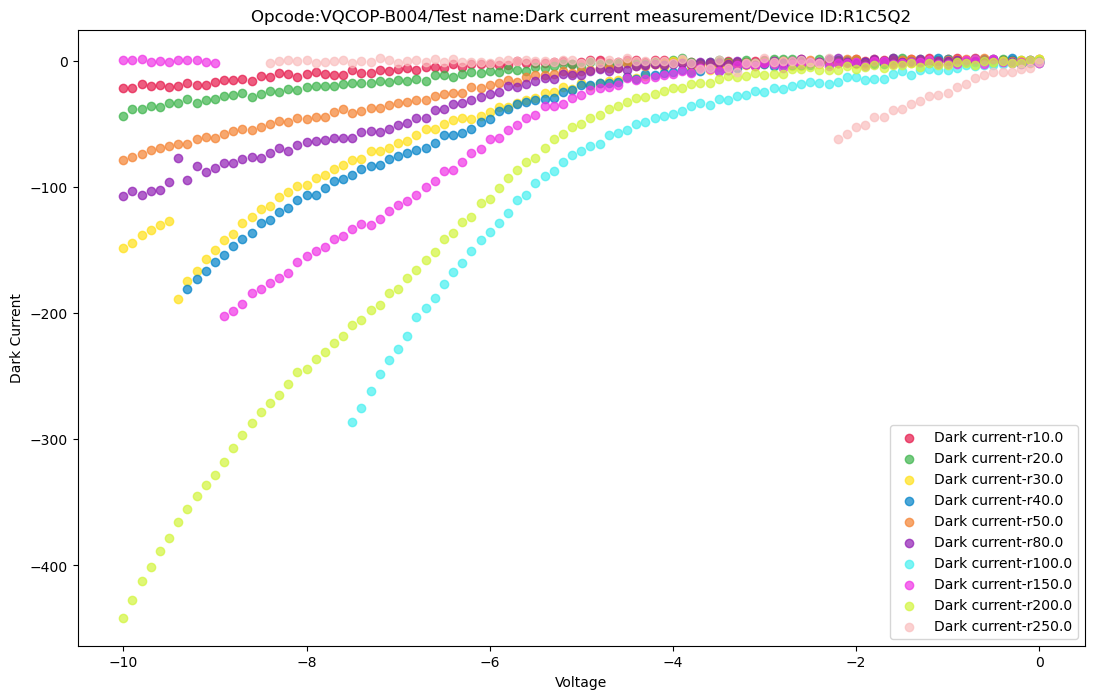

,Voltage step:,Dark current-r10.0,Dark current-r20.0,Dark current-r30.0,Dark current-r40.0,Dark current-r50.0,Dark current-r80.0,Dark current-r100.0,Dark current-r150.0,Dark current-r200.0,Dark current-r250.0
Voltage step:,1.000000,0.882644,0.932653,0.971043,0.985883,0.968690,0.962213,0.998879,0.462283,0.997635,-0.598261
Dark current-r10.0,0.882644,1.000000,0.841983,0.890833,0.841462,0.887047,0.860559,0.722816,0.348829,0.884089,-0.360582
Dark current-r20.0,0.932653,0.841983,1.000000,0.939088,0.926319,0.934615,0.940049,0.844025,0.405109,0.925396,-0.459226
Dark current-r30.0,0.971043,0.890833,0.939088,1.000000,0.954687,0.953803,0.941701,0.936760,0.447723,0.968165,-0.529861
Dark current-r40.0,0.985883,0.841462,0.926319,0.954687,1.000000,0.966622,0.952823,0.972413,0.756081,0.985117,-0.614286
Dark current-r50.0,0.968690,0.887047,0.934615,0.953803,0.966622,1.000000,0.954525,0.929023,0.445277,0.971904,-0.559566
Dark current-r80.0,0.962213,0.860559,0.940049,0.941701,0.952823,0.954525,1.000000,0.908489,0.435644,0.961468,-0.551378
Dark current-r100.0,0.998879,0.722816,0.844025,0.936760,0.972413,0.929023,0.908489,1.000000,0.960246,0.994040,-0.631306
Dark current-r150.0,0.462283,0.348829,0.405109,0.447723,0.756081,0.445277,0.435644,0.960246,1.000000,0.460501,-0.596404
Dark current-r200.0,0.997635,0.884089,0.925396,0.968165,0.985117,0.971904,0.961468,0.994040,0.460501,1.000000,-0.596326


In [19]:


df = R1C0Q0

# Define a list of colors for each dataset
colors = [
    '#E6194B', '#3CB44B', '#FFE119', '#0082C8', '#F58231', 
    '#911EB4', '#46F0F0', '#F032E6', '#D2F53C', '#FABEBE', '#008080'
]

# Define the response variables corresponding to different radius
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]


plt.figure(figsize=(13, 8))
for i, response in enumerate(response_variables):
    plt.scatter(df['Voltage step:'], df[response], color=colors[i], label=response, alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Voltage')
plt.ylabel('Dark Current')
plt.title(f'Opcode:VQCOP-B004/Test name:Dark current measurement/Device ID:R1C5Q2')
plt.legend()  

plt.show()

df.corr(method = 'spearman')

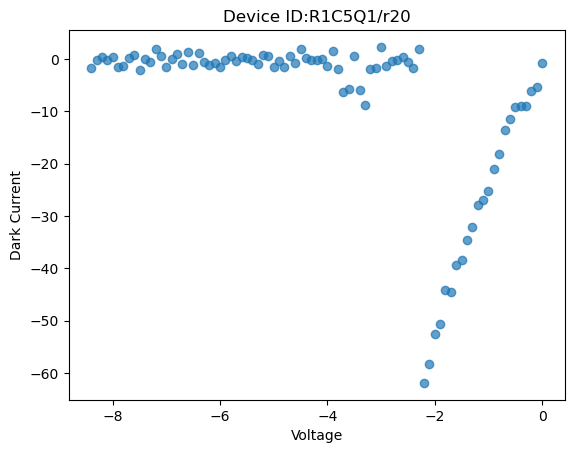

In [20]:
plt.scatter(df['Voltage step:'], df['Dark current-r250.0'], label=response, alpha=0.7)
plt.xlabel('Voltage')
plt.ylabel('Dark Current')
plt.title('Device ID:R1C5Q1/r20')
 

plt.show()

In [37]:
import pandas as pd

# Define the response variable columns
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]

# Convert all response variables to numeric
for column in response_variables:
    df[column] = pd.to_numeric(df[column], errors='coerce')

error_max = 10  

# Iterate over each response variable column
for column in response_variables:
    response_variable = df[column]  # Get the column data

    # Loop through the data while avoiding out-of-range indexing
    for i in range(len(response_variable) - 1):
        error = abs(response_variable.iloc[i] - response_variable.iloc[i+1])  
        if error > error_max:
            print(f"Error detected in {column} at voltage {df['Voltage step:'][i]} : {error}")


Error detected in Dark current-r30.0 at voltage -9.3 : 14.289900000000017
Error detected in Dark current-r30.0 at voltage -9.4 : 61.571900000000014
Error detected in Dark current-r80.0 at voltage -9.2 : 11.036259999999999
Error detected in Dark current-r80.0 at voltage -9.3 : 17.15728999999999
Error detected in Dark current-r80.0 at voltage -9.4 : 18.961759999999998
Error detected in Dark current-r100.0 at voltage -5.7 : 10.4499
Error detected in Dark current-r100.0 at voltage -6.5 : 10.821200000000005
Error detected in Dark current-r100.0 at voltage -6.8 : 15.2637
Error detected in Dark current-r100.0 at voltage -7.1 : 11.194600000000008
Error detected in Dark current-r100.0 at voltage -7.2 : 13.99199999999999
Error detected in Dark current-r100.0 at voltage -7.3 : 12.87130000000002
Error detected in Dark current-r100.0 at voltage -7.4 : 11.292100000000005
Error detected in Dark current-r150.0 at voltage -8.9 : 200.893769
Error detected in Dark current-r200.0 at voltage -6.1 : 10.4133

In [11]:
df['Dark current-r20.0'].count

<bound method Series.count of 0       0.730215
1      -1.365843
2      -0.772474
3      -0.489119
4      -0.364613
         ...    
96    -31.910230
97    -35.811270
98    -34.901400
99    -36.166890
100   -36.393670
Name: Dark current-r20.0, Length: 101, dtype: float64>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import spearmanr

# List of files with their respective skiprows values
files = {
    "R1C0Q0": ('P22406121-3_R1C0Q0_VQCOP-B004_2025-02-16-17-06-57.csv', 18),
    "R1C1Q0": ('P22406121-3_R1C1Q0_VQCOP-B004_2025-02-16-17-13-28.csv', 19),
    "R1C1Q2": ('P22406121-3_R1C1Q2_VQCOP-B004_2025-02-16-17-02-07.csv', 19),
    "R1C2Q0": ('P22406121-3_R1C2Q0_VQCOP-B004_2025-02-16-17-17-40.csv', 19),
    "R1C4Q0": ('P22406121-3_R1C4Q0_VQCOP-B004_2025-02-16-16-42-43.csv', 19),
    "R1C4Q1": ('P22406121-3_R1C4Q1_VQCOP-B004_2025-02-16-16-48-20.csv', 19),
    "R1C4Q2": ('P22406121-3_R1C4Q2_VQCOP-B004_2025-02-16-16-57-42.csv', 19),
    "R1C5Q0": ('P22406121-3_R1C5Q0_VQCOP-B004_2025-02-16-16-32-20.csv', 19),
    "R1C5Q1": ('P22406121-3_R1C5Q1_VQCOP-B004_2025-02-16-16-37-27.csv', 19),
    "R1C5Q2": ('P22406121-3_R1C5Q2_VQCOP-B004_2025-02-16-16-52-53.csv', 19),
    "R1C6Q0": ('P22406121-3_R1C6Q0_VQCOP-B004_2025-02-16-16-20-04.csv', 19),
    "R1C6Q1": ('P22406121-3_R1C6Q1_VQCOP-B004_2025-02-16-16-25-37.csv', 19),
    "R1C7Q0": ('P22406121-3_R1C7Q0_VQCOP-B004_2025-02-16-16-15-25.csv', 19),
    "R1C8Q0": ('P22406121-3_R1C8Q0_VQCOP-B004_2025-02-16-16-00-16.csv', 19),
    "R1C8Q1": ('P22406121-3_R1C8Q1_VQCOP-B004_2025-02-16-16-04-57.csv', 19)
}

# Selected radiuses based on anomalies in the report
response_variables = [
    'Dark current-r10.0', 'Dark current-r20.0', 'Dark current-r30.0', 
    'Dark current-r40.0', 'Dark current-r50.0', 'Dark current-r80.0', 
    'Dark current-r100.0', 'Dark current-r150.0', 'Dark current-r200.0', 
    'Dark current-r250.0'
]

# Step 1: Preprocess data and extract features
def preprocess_data(files):
    data = []
    raw_data = {}
    for label, (filename, skiprows) in files.items():
        df = pd.read_csv(filename, skiprows=skiprows)
        df = df.dropna()
        raw_data[label] = df
        
        for response in response_variables:
            if response in df.columns:
                mean_current = np.mean(df[response])
                std_current = np.std(df[response])
                correlation, _ = spearmanr(df['Voltage step:'], df[response])
                diffs = np.abs(np.diff(df[response]))
                max_jump = np.max(diffs) if len(diffs) > 0 else 0
                data.append([label, response, mean_current, std_current, correlation, max_jump])
                
    return pd.DataFrame(data, columns=['Device', 'Radius', 'Mean', 'StdDev', 'Correlation', 'MaxJump']), raw_data

# Step 2: Detect anomalies using Isolation Forest
def detect_anomalies(df):
    scaler = StandardScaler()
    X = scaler.fit_transform(df[['Mean', 'StdDev', 'Correlation', 'MaxJump']])
    model = IsolationForest(contamination=0.1, random_state=42)
    df['Anomaly'] = model.fit_predict(X)
    df['Anomaly'] = df['Anomaly'].map({1: 'Good', -1: 'Weird'})
    return df

cluster = 3
# Step 3: Apply clustering (KMeans) to anomalous data
def cluster_anomalous_data(df):
    anomalous_data = df[df['Anomaly'] == 'Weird']
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    anomalous_data['Cluster'] = kmeans.fit_predict(anomalous_data[['Mean', 'StdDev', 'Correlation', 'MaxJump']])
    return anomalous_data

# Step 4: Plot all clusters individually
import matplotlib.pyplot as plt

def plot_clusters_individually(df, raw_data):
    """
    Plot each cluster individually, showing the data points for each cluster in separate plots.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the anomaly and cluster information.
    raw_data (dict): A dictionary of raw data for each device.
    """
    # Filter out anomalous data
    weird_cases = df[df['Anomaly'] == 'Weird']
    
    # Iterate through each cluster and plot it separately
    for cluster in range(cluster):  # We have 3 clusters
        cluster_data = weird_cases[weird_cases['Cluster'] == cluster]
        
        plt.figure(figsize=(10, 6))
        
        for _, row in cluster_data.iterrows():
            device = row['Device']
            radius = row['Radius']
            
            # Plot the data for each device and radius
            plt.scatter(raw_data[device]['Voltage step:'], raw_data[device][radius], 
                        label=f'{device} - {radius}')
        
        plt.xlabel('Voltage Step')
        plt.ylabel('Dark Current')
        plt.title(f'Cluster {cluster} - Anomalous Data')
        plt.legend()
        plt.show()

# Usage: After anomaly detection and clustering
# plot_clusters_individually(anomalous_data, raw_data)


# Step 5: Save the anomalous data to Excel
def save_to_excel(data, filename):
    data.to_excel(filename, index=False)

# Running the full pipeline
data_df, raw_data = preprocess_data(files)
data_df = detect_anomalies(data_df)
anomalous_data = cluster_anomalous_data(data_df)

# Plotting the results
plot_clusters_individually(anomalous_data, raw_data)

# Save the anomalous data with clusters to Excel
save_to_excel(anomalous_data[['Device', 'Radius', 'Mean', 'StdDev', 'Correlation', 'MaxJump', 'Cluster']], 'output_file.xlsx')


/Users/isma/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/b6/152y_gms5q79hhc788k75tnr0000gn/T/ipykernel_5870/373547529.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalous_data['Cluster'] = kmeans.fit_predict(anomalous_data[['Mean', 'StdDev', 'Correlation', 'MaxJump']])


UnboundLocalError: cannot access local variable 'cluster' where it is not associated with a value